In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
sns.set()

In [6]:
points = pd.read_csv('../data/processed/points.csv')
angles = pd.read_csv('../data/processed/angles.csv')

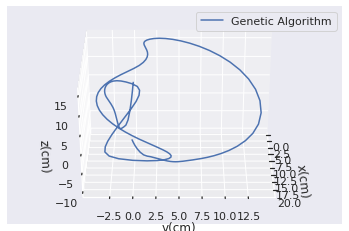

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(points['x'].values, points['y'].values, points['z'].values, label='Genetic Algorithm')
ax.set_xlabel('x(cm)')
ax.set_ylabel('y(cm)')
ax.set_zlabel('z(cm)')
plt.legend(loc='upper right')
ax.view_init(30, 0)
#plt.savefig('traj_2_0.png', dpi=None, facecolor='w', edgecolor='w',
#        transparent=False)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAV0AAADnCAYAAAC9roUQAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4yLjIsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+WH4yJAAAgAElEQVR4nOx9d5gb5bn9maJpkrZ67fV63cu6F2zTbIopptdACIQekpBwb8JN4OYm4ceFXMi9EBISIFwgxRBuwEAoBowNhGZMMdgG427j7rXX3qpVLzPz++PTN5qRRlppJa3LznkeHhuPNNLOSmfe7/3OOS+j67oOBw4cOHDQJ2AP9Rtw4MCBg/4Eh3QdOHDgoA/hkK4DBw4c9CEc0nXgwIGDPoRDug4cOHDQh+BzHWxt9ffV+3DgwIGDowZ1dd6sx5xK14EDBw76EA7pOnDgwEEfwiFdBw4cOOhDOKTrwIEDB30Ih3QdOHDgoA+RU73gwEF/g6om0NnZikQidqjfioPDHCzLQZY98HgqwTBM3s9zSNeBAxM6O1shSQrc7vqCvkgO+hd0XYeqJuD3d6GzsxU1NQPzfq7TXnDgwIREIga3u8IhXAc5wTAMeN6FqqpaxGKRgp7rVLpHKEgiZwI8z4NhGOg6jP/I8UP69o5oOITrIF8wDAugsC+bQ7pHKHQ9AUAzCIJhyH/2j3UI2YGDwwVOe+EIhK7rYBgdup5fRcYwAMsCHEf+4/nUfxxHjuUibQeHDolEAn/5y+O48spLcfXV38R1112JO+74d+zYsb1sr/nGG69h9+5dxv8vX/4B/vjHP/TqXHfe+XOcf/4ZSCQSxr/t378P5513etHvMx1//vNjeOedtwAAq1evxGeffVr21+wNnEr3CATHAV5vBTo7u4s+Vy6y1TTyp1MhHzr8+td3IxKJ4IknnoLX64Wu6/jkk4+we/cujBw5qiyv+cYbr6GysgrDhg0HAMydewrmzj2l4PN0d/vw+ecrMGzYcCxf/gFOPbV8pKeqKm666Wbj/7/4YhXC4TCOPfb4sr1mb+GQ7hEGXdegaSpYlixSWJaBppWHDVkWEAQXeJ5FKBS1HOsvhPzR2v1Y/tX+spx77tTBmDNlcNbje/bsxrJl7+Gll96A10sCVBiGwYknzjUeE4/H8cQTj+LLL1chFotjzJgx+OlPfw5FUXDvvXdBEATs2bMbBw8ewKRJU3DHHXeDYRgEgwE8/PCD2LZtK2KxGGbMmIV//dd/w9Kli7F580b8/vcP4E9/+l/ccsuP0dp6EB9//CHuued+AMDrry/CCy8sBAC4XC7cf/+DqKmpzXj/b721BCeeOAfHHnsCFi9+NSvpvv/+O3jiiUchiiLmzTsDTzzxKN56axkURcGnn36Mxx9/BJqmoaqqGrff/gs0Ng7F6tUr8Yc/PICmpgnYsmUzvvvdH+D999/B+PETMH36TCxa9BI0TcPKlZ/h9NPn44wz5gMAHn/8j/j0048QiUTwH/9xJ6ZNm479+/fhppuuwQUXXIIVKz5GNBrFnXfeg0WLXsSGDesgCCL+539+i9raAb37RafBaS8cQdB1HZqWgKpqYFkWFRUeeL0Kqqo8qKhww+ORIcsiRNEFnufAssX3C0grI/M8LJu9ZUGPOS2L4rBly2Y0Ng5DRUVF1sf8/e9Pwe12409/+hueeupZ1NbW4emnFxjHt2/fht/85g94+unnsXnzJqxcuQIA8PDDD2L69GPwpz/9DQsWPIPOzg4sXvwqzjvvQjQ1TcCtt96GJ598BrNnH2d5vdWrV+Lppxfgd797GE899SweeugxuN0e2/e2ePGrOPfcC3HKKadh3bq1aGtrzXhMR0c77r//17jvvgexYMEzEEXRONbZ2YF77rkTd955D556aiHOPPMs3H33HcbxHTu248ILL8GTTz6DOXNOMv599OgxuOiiS3H22efhySefwTXXXA8A8Pl8mDx5KhYseAY33PBdPPbYQ8ZzfD4fpk6djgULnsH551+EW2/9AS699HI89dRCNDVNwIsvPp/1d1AonEr3iIIOQIOuEzITBB6dnQGwLAOWZcFx9E8WLhcPjmPBMAw0TYOq6sk/NePPfGaSZiPdXGCz3MrtNvMO9wp5zpTc1WhfYseO7bj77jsQiURw/PEn4tZbb8NHHy1DMBjE+++/CwCIx2MYM2as8ZyTTjrVILKmpiY0N+/F7NnA8uXLsHHjeixc+HcAQCQSwcCBg3p8D5988hHOPvs8o+pTFMX2cVu2bILf78cxx8wCwzA49dTTsGTJ67jmmhssj9uwYR3GjWvC0KHDAADnnXcRHn74QQDA+vXrMHr0OKONcu65F+K3v70PoVAQANDYOBSTJ0/N7+IBkGXFIOdJk6bgkUd+bzlGVxDjxo1HXd1AjB3bBAAYP348Pv98Rd6v0xMc0j1CQKrceJJwCQmGQhEQIibESpb8asZzKRGzLAueZ8Gy6YSsQdP0ggm5UJgrX45jIYpC8mc4Mgm53Bg3rgl79+6G3++H1+vFyJGj8OSTz+DFF5/Dpk0bAZBr9NOf/gdmzpxtew5RFIy/sywHVaWfDx2//vUDGDKksSzvffHiVxEI+HH55RcCIDcDWXZnkG4xkGV7ws8GQXAZf2dZFqqayHpMEETT/5uvW/Fw2gtHCHRdBdUD0g9ILBbPi5g0TUM8nkA0GkMoFEUgEIbPF0RXVwDBYASxWAK6roPnOUiSgIoK0rLwehVIkgCOYyEIPHieK6mGleNSHz+qsLBrWVCFRX9rWQwdOgxz556C++67B4FAwPj3cDhs/H3u3JPx3HN/RzRKbl6hUBA7d+7o8dxz5pyM//u/pwwy6erqwr59zQAAt9uNYDBg+7wTTpiDpUsXo6OjPfl6IUSj1n5/LBbD22+/iT//+Wn84x+v4R//eA2LFr0JhgHWrPnC8tiJEydjy5bNaG7eCwBYsuR149ikSVOwbdsW7Nq10zg2dmwTFMXd48+X62c41HAq3SMAuq5D11WjyvV6FcTjZDMtkdCKOreqkso2Hs88xnEseJ4DxwngeT5ZLTNgGMZSFZur5UIq5HzJMx8Ncvrfjxb88pd34ckn/4ybbroWPM/D6/ViwIA6XH319QCAq6++Hn/5y+O46aZrk5urDG688bsYMWJkzvP++Mc/xaOPPoTrr78SDMPA5RLwox/9FA0NQ3DhhZfikUcexDPPPI1bbvmx5XnHHDML11xzPW699YdgGBaC4MJ99z1o6cV++OH7GDKkEY2NQy3PnT//HCxe/CpuuOG7xr/V1NTittt+jttu+xEkScKJJ54EnuchSRIURcEdd/wKd9/9S6iqiqqqatx553/ldd1OPnkefvGL23H99VdZNtIOBzB6jm+JM67n8ICmJaDrcQBkSe7xKIjHE4jH44jFVPA8V7bXZhigosIDny9g+Tdzy8L8d/J+7QhZsxAiyzLweBR0dwdL/p5lWUQ4HO0VIbe07EJ9/fCSvycH2REKBY3qdfHiV/H664vwv//7l0P8rvKH3Wcm17gep9I9zEGq3AR0nQHDAF6vG93dAQiCCyzLJp1p5Xz9zCpT11MVcjoYhgHLMgYJu1w8RJGQMulL68mesQaGIdW03XmKgSi6EA5H+3WFfCThhRcW4r333oGqJlBRUYmf/eyOnp90BMMh3cMcpJdLyEyWRaiqilgsnlz2l6/C7S1I+pKeg5CJyoLjSH9YUSQTIdurLMqB/tQbPtxx3XXfwXXXfedQv40+g0O6hzF0XYckcQiFEmAYwONR0NVFWj6apiU31MpfolHZWLGKBkLIKlQVYJgEBMEFvz8EgBAyrY45joEg8Mb/k+dptqRcDmSTydF/cqpiBxS9+U44pHsYQ9cT8HqrEYnEoShSso9L2gmapicJqS/eByGcUr5WettC13UkEirsJG9WQmZNm3rphKwV7c4j8qAEeN5lc6x87j8HRybi8Rg4rjAadUj3MAVVLGiaCo7j4HbLaG/3GceJK41BX1a6ffFa2V4/GyGnjCG0h0w286qqPNA0a1WcDzG73R74/V2oqqpNxvY5cJAJXdcRj8fQ1dUKr7e6oOc6pHuYgm6QaZoOt1tCJBKzCLQ1TTOpBfSSWH6zv5fCXWn5oBTnJMSqJkmZoKrKg66ugA0h80m1BZNByPTPiopKtLe34sCBvUi/yZSixeLg6AHH8fB6qyHLPeuGzXBI9zCErmuGLldVNYiigLa2rrTHECJ0u2W43bLNMjvV/yz+/ZRn06ncBGZHyBRmhUU6IVdWemyqYw2KQm5+ducrBtSUEgiEM471l2Ch/gSHdA9DaFpKscDzHOLxhC15UiLobVWXb3+yXJXuoQQl5Ny2aSYjx0JRJKiqWlLbdK4KOluOBfkZyJ8OIR9ZcEj3MIOuawCILpfKwmIx+8m0DMMgEoklCZnNWdXlIuRMMrYScrlIN5sqos0XwaIPd6ClI4xoTEV1hYi6KgmNdR40DatEfY2S8/0U+17pNUiH16sgEokCYHrIsbCqLHoi5N5uUjqEfGTCId3DCDS6kRghiGMrGo0ZvVsz6Bc9Go0me7rZz5t7mZ2q6rKRCMsyUFUGPF++MByKeELD3QtWIhxNYNTgClS4XWjtDGPDjk5E4+T9V7hdGDe0CtNG12LGuAGocAs9nLU0IPZn3ViJpMOqsODAca4ctmk96dIrjRwvHfTzkNoPSN1EHEI+tHBI9zACqXLJN4LneQgCD58vALdbznisx+NGIpFIEnLve4zZqjogRSKi6ALHsZBlASzLlix7wU6Ktn1fN3yBGP71G5Mxe8JA02N17G8PYfPuLmzZ48PGXZ1YuakVzBtA09AqzBxfh5lNdRhQKfX6WuT5rrMe6SnHwix5E0U2eS3pzVaHJAlZbdO9BcdxGec5mqI3j0Q4pHuYIGX3TYXaBAJhaJpmSeMCyMaLIPAIh6NltQJTEqHtiXA4lSaVjUQAZJFp2ZEIiaU0E5lbIh9JNa3fzDAMGga40TDAjXnHDIGu69h1IIBVm1qxanMr/v7WVvz9ra2YOKIa58wZhQmNHgiu0jr2itEqZyNkhgFkWQK9BtQ2bXctzdc03/fBskzyZt4zCrFNm/90UBgc0j1MkB7dyHEcwuGIYZ01w+t1IxAIG6aB8r+3zJ5uLhJJ7x/bZS+Q6pq8f3OlXVdNqvoDHaGc74lhGIyo92JEvRffOHUUWjpC+HT9ASz7cj9++/dVUCQeJ0wahFOmN2B4vackPelytAHo6RIJFbGY9eaZnmMhCLxxbdOvZS7bdCnecjohsywDQXAhEok5hFwgHNI9DEDsvjwiEQ2Anqxyg8YxM2GYCVmSRLhcHMptWihEMtZTGI7Z6kvzJNxuyZC8KZqGaq+INh+p4vOVvNXXKLj4pJG4cO4I7GmL4I3l27Hsy/14Z1UzRjV4cfZxwzBrfB34PrhJFYpsFXRPORa0F29HyLT3rus6XC6+5DkWtG9N378TLJQ/HNI9DKDrKmTZDVXVkgRLVAkUtMWgqho8HgWBQMj4976wApdKvZDuLON5DuEw0b2aCbm+VsHBrgg8HilJvHqWuMjMH5xlGEwbW4fhdTKC4Tg+XncAb32+B4++vB41XhFnHtuIU2c0wC1l2nwPFXpTQaeupf35KCnSVlSpcyzyvSE6hJwJh3QPMWgvlw6bJBmz1sR7eozn+aRMjPRWU660cle65ZKMWV+DEnJthYj1OzrR3U1uLoVqkCncsgtnzm7E6bOGYM3WdixdsRvPvbMNryzbiZOnD8ZZxw7FwOrMTcq+RqnbFvRaMgyDREJDMBgxjtFrmerHu4zZeoUYbMi4m+Lec38lZId0DzFodKOqapAkwYhuNIOSK6lygxn/Xv732LfmCK8iIBhOXYNCnWUAzV5IkcZxkwdj9sRB2LbXh6UrduPdVc14Z2Uz5kwZhAvnjsCgmtzztkod+GM9d3nsxeS8VsLMbQrJ/+ZGVl7ly3JOJ+REeWOj+xQO6R5CmBULJKpRRkeHL+NxlJB1XUc0aiUjmrlg3lwp/fssnw3YjszdEo9YQkM8ocHF576p2JFIKnshcyDn1KZBmDa+Hm2dIbz0/td4c8VufLTuAOZOHYwL5wzPUfmWL/CnXKRbaCpaTzc38/XkOA6yzEJRxKIdj/0NDukeQlCpF7H78tB1DQmbW7qmaZBlGZ2d3TbHdFRWeozWQzaXWTGmhr6udBOqBgYAV2SITy4Nssiz+Pb8cbhg7gi8unwn3l6xG8u/2o95MxvxjXljMKhaTmtZ6GWsdMtTRVODSymQTsiCwKO7OwRd142NUUrK1go5s3fc3wnZId1DBPOwSZZljNaCHXieA4mSsydkQXChs9NvtBrycZkValUtB7JV0L5gDB7FVdbkNKqwkF0srpg3CmfNGoLXP9mF91Y3472Ve3Hy9AZ868yxGFClGJI3gFiBi9HN9iVYlkEiUf7qnFwDoKcci+yfxdw5FmXKqj9kcEj3EEHTUlWu2y0jGo1BEDLtrAzDQBSFrDvV1LRg/pzm4zLLz6qaIpRyBJmnzBFWtPuiqPL0jbWXosor4ur543D+CcPx+se78O7qZny8bj/OPX4YzjthOBTZBUWREApFitbNmkHMC+UhRqr8OJTnLeSzaCZk8/ULheyzR45UOKR7CEA2N0iVy3EsFEVCW1sX6urEjMcqioRYLGFrgnC5SEshHk/k/cXtramBYZBM2Crd/DK7Sjehati8uwtzptYXde7eosor4uqzxmH+sUPx/Lvb8MqHO/HBl/vwzdPGYv7xw/PWIOcr0yIVXzmr0dKXibRtUCzysU2Tm1LRL3VYwSHdPgYNtQGQDLWREQpFjIrArH+kVXBnpw/V1ZUZ5/J63YjH40XnL5D3ldvU4PXKSR0xyjq/bMvuLkTjKqaOrinq5ykWA6tl/Ms3JmPLni488/bXeHzRerz12R5ccdooTByZ+d4KGzdklWkBZGx8vtMt8kW5xgsVYlrpLcyfRYd0HRQJHQBZspPwahGtrZ0AyAfNbIv1eGREIlHE42rGRhYZwc4gHI6VdYkK0P4zEI+rGX1ne0LJN8c3s73wyfoD4DkGE0cUNgKlXBg3tAp33jATKze3YuE/t+F//v4lZowdgCvPHIP6HmRmFLkIWRBcEASXccMtZQ5yueDMiisODun2IXRdhyCwiMc5qKoGr1dBMBi2bEiYN8NkWTImRqRXwV6vG35/yPDA98V7t9v0Kmx+mZVQiCJAh64T0tnXGsCHa1pw+qwhkITD56PJMgzmTGnAiVOH4OX3tuK1j3bhl49/hgvnDsd5Jw4v0lpMiNUsBTRel7Xe0HpSBZg3ocpJjCzL2qpsHOSHw+eT3Q+g6xoEgfRtGUaFy8UbI9WBVKULkHHrtO0ApKzAmkY0u4Ce3HxzHbautJ5yfCVJsOxqv/rxbvA8i6vOHg+3ImQQy6GcT8YwgIvncMGcEThp6mD839tb8eIHO/Dp+oO4/twmNA2r6uV5s69S8ptukRmmTq8VaQW5Sn79OI5FLNY3v4ujrbUAOKTbZ0jZfV3geQ6yLGbMxKLEynFkZhZtOwCAqupGFUyswkHjOUdS/gIFIQIVuk7UFxt3duLDL5px7onDILAwNg8LUViUFylzRJVXxL9cOhlrprbhqSVbcO/fVmPejAZ88/TRBWc69NYY0ZMqQBBcxrinUl8/EmrfNzouh3Qd9BrE7ks+4KIoGklhZqiqBp4X4PFY2w5AilxlWYSqaoZVOOVKO3ySxgpFW1cYj7y0DvW1Ci6cM6Lo2EgAJU/WspPLTRszAP/9/Wq8tGw7lq7Yg9Vb2vDt+WNx3MSBed+gSmlgoEgRKhAKpTKQ069frhzkXAqVvpyK7JCug14hZfclFQJx8wQyHqdpWnKpyMLn82ccI9MbREtLwtwHLuco9nK40nQdiMVV/OEfa5FQNdz6zamQxewfyXxjIwWBz6GwsIrx84f9jU0UOFx5xlicMKkef31jEx59eT0+WtuC684ehwFVPYfpEAIr4G3k+25tpGg9Xb/c2b2k1aPr5PrR1DsHhcMh3T4ADbUhxMAZAyXToaoqOI6H3x+0OaZBlkXE44kMZ5qu65BlER6P2S1VvHwr/TVKHa4TT6h45MW12N0SwE++NRWDa/NTA9ghlaylAhAtyVqZCgu2AIUFPUfuqmvEYC/+84aZePvzZrz4/nb84onPcO3Z4zBnSn0PQzTLM4qeuNHy/73nl93LwuXiwDBk9lrpbmi53ldJTnNYwSHdMsM6hge2884oCCEjo+0AkIrW5eLR3t5le8zjUZJqht7Kt3r6OUrbXgiE43joH+uwaVcnrjpzLKaNGVCyc6d/UYtRWKRStcj/51pacyyLs48billNA/D4qxvxxKsbsebrdlx/ThPcsn2vt3wJY6xxsy8W1utH5IOhEPmMZkZFFn5D629wSLfMMIfakH6smvygZi7/PB7FWManfxFF0WX68FtBXWmJhAqW1VE4ufTsgS9le+FARwi/XfgV2nxh3HrFdBwz9tAZIfKblEwDwRlUVPA2GRapa6frOgZUyfj51TOw+JNdeOmDHdi614ebL5qI8cMztcflTRgrhxvNaowoVVSkHSEfjVUu4JBuWWEOtWEYQqqdnX5UVnrAspzhTAMAURSM3WWOYy0kwDAMJEm0/XLSGWrRaAi5RrHnTy6Z8iO6u00fV4xaYPPuLjz0j7XQdB2/vG4mpo4dhGAw3PMTDwHMCgGOI8t1uoGZPpiT/j/DpDayLj99HKaPq8NDL3yF/376C5w/ZzguOXmkRddb3izd8rjR8tXo9vyZsyaTpQfhBAKZK76jAQ7plhHmKtftlpPVaCLZu2Utwcw0oFxR5AzSpc40MjXWCo9HTj6291VoPqEkLhcHlmWgKFJycyX/3W4ACEbieOG97XhvVTMGVsv46ZXT0DjQWzZFROlh3UjLV2ExfkQtHrz1FCx4fQNe+2gXNu7qwo+/OR2Daqit+vDI0u3r8+aTTHa0pYtROKRbJui6ZoludLtltLeTgHKzCQKAUcVGo3GIogiW5QCQb7PZmSZJouVDT4+FQhGLj7+UoORC5Gwc/H4yQodW2LRayaYWSCRUfPTVfvxt6WZ0B2M489hGfOOUUTlVCsWhPCyeb8JaNoXANfPHYMKwSvzl9Y247ZHluOG8CThj9lAwDFBZ6SnphlQ5b2R9kbuQqwg4GuCQbpnA8wxUldh93W4ZkUjMyC0gpMsZj/V6FUMGRqVhFOZAHFWlVmDVckxVVbhc5bUCp/d0CUmosIsAprvdrb4I/vraRqz5ug2jh1TiP286HqMaKi0942z97SLfbQnPVTrMGl+HUQ1ePPHqRjz28jqs/boNt141E+Fg2Kb/mUrZKnRDimHKE+kI9G3ugtPTdZA3dF1LZuCyiEZjRnQjhaapEJLZAooiIR5XDRmYmUA5jrUE4qQ0uarlWF9YgQvZSNvV0o2lK/bgk3UH4OJZXH3WWJwxsxEsyyAQCFk2pxiGhderFBRqfShQqjZATYWEf//2dLy6fCde+mAHDj76EW65ZBJqKsQc/c/8FBbWuMjSV4p9aYo4muGQbolBoxtVlYy/drmsGQpAarov6fUq6Oz0WY5JUsrumx6IY85moMcIGR/a3FFN17F2WzuWfLoHG3Z2QnRxOG3mEJx3wnDUVKRygs273fG4Co+HNab+Zgas88Z1OnT239KDZRhcfNJIDK/34n9fXo///Ovn+PFlUzCmMTO+E+jNJiiRHnq9Sto105PXrHcXjfRZj8ALfpjBId2Sg0Q3qqoKURTgcvGWDAUg1V4gAeUxy5eJVrM8z0EQBHR3d1qeZ3csRcZ9/4WIxVV8tLYFb362B/vaQqj2irjitNE4dUZDVm1qCtZox2Ltv+XsBZajyps9YRBGNFTh3ic/x6+fXo3rz2nCydMbCjqH3c8simTlE4vFLQoLavk1KywKuYmVS4Zmh6O4peuQbilBCCBubKa4XHxGhgIAozIlm2tWswPdZCOVbCgjf4HjONsKuC9Hsauahi27u/DJugNYsfEgQpEEhtd7cPNFE3HsxIF5Rx3ma7jI1/7LcQxcLhL0UlVltznV+4DwcmxOMQzQONCLu26chT++tA5/fn0Tdh8M4MozxoAr4vdJbxCluImZ/2RZx/pbCjikW0IQBxD5QjMMSXXKpkElaoVYxoeYElt67CNAiEcUBfA8ZzmmJ2eYybIIt1vOsACXqi+6a3833l6xCx+v3Y/27ihEF4eZTQNwyvQGjB9e1acTgynS3WYMw6CiQoHPFyxanG9F6StdSo4e2YXbrpyGhe9sw5sr9mDvwSBuuXQyvErvNkeJlja7G62Qm5hZlQKkCoZyWH7T3+PRCod0SwSrEYLJ6S6jfUq7/AUKarM0g1qBqWwr/RjR+oYNYslmdChkSdnRHcWn6w/g43Ut2H0gAJZhMHlUDS4/bTRmjquDKHDZn9wj7AdTlgq5e6GZAeG5JiaXY0y6+bPBsSy+feZYDBvowYI3NuHuv36OW785FY0DPQWfl/T3e0eEuSzTHo9sbPgWq7Do+X306mlHBBzSLRFodCPDkCxTjuNs3WUA2QQj4SyZhEOnQNiNW6ekYJfNwDBALBZHPJ7I2mpId1Fli/XzB2NYsb4Fy7/aj407O6EDGNVQge9cMBGzmurglooh2hTKGRfZE3LZV+0mJjMMg8pKd0k39OxuyCdNG4yGAQr+8MJa/OrJVfjJFVNt7cM9nbdcs9HicdW2su3ZZl6e1deRCId0SwBzdCPdNQ4EgpAkkptrJl0aUE5HeafD61WMDZB0KIp9WE7KChzL+eXP3uNjoOnA2u3t+OirFqzadBCxhIb6WgVXnDkOc6c1oL5GBsdxiMcTiMXiR/Uutt11qqrywOcL9NALtSeXbMgm7Ro9pBJ33Tgbv3nmSzzw7Br86PIpmDq6Nu/3X143mv3PU6zN3LyySJ/Dd7TBId0SwBzdSEbpAJFIDC6Xy2KCAGDMRdM0HS6X9fKLogCAQTwezyBkOgnArmVhtgIXUj3ouo4d+/34cM1+fLrhAILhBLyKCydPb8CJkwdh9JAK48tCFRcuF28Mxcy24XK0VjD590KzO/TMf+ZqWdRUiPjFtTNw/zNf4sHnvuCceGcAACAASURBVMIPL52E2eMH5vU+y6G0KOac+djMzasvEst59G7YOaRbJNKjGz0etxFQTjIWUqTL87yxQSYILoOgKbxeMoaHLGnTydqNQCAEr1extCyoFTgcjtpWznboDsbw8boWLPtyP/a2BuHiWcwcNwAnTqnH5FE1FvWBuYKhFlA6RNFsAy5F//hIRm/jI10uHYLAG2RuvnF5FQH/cfUM/HbhGvzxxfX47oUa5kypz/k+yhWKXq7q2W5VcTTLxQCHdIsGw6R6s7IsQVVVI4lKVTUIQopYSduBqBnS7b6yLELTdMRicTCMdcKvJAmG2kFRJMOVBpAqNxyOGNkI2aoRVdPw1dcdWLZmH77c2g5V0zGqoQLXn9OE4yYNzGu2V7orLVdoSb79Y10HeJ4tKHD7SEO2pbfHIyMWi4MGxKffuDRNg9ut4c4bjsV9/7caTyzagFhcxbxjhmR9LUK65Y90LCeO1hszhUO6RUDXdXg8EmKxBCKRKDweGZ2d5um+qkGsdHONboIR3WOqmvV4cuUvZA6iBKw2YUFw2Y5i94dieG/1Pryzai86/TFUuF2Yf+xQnDStHo11he2M0/CefJCrf2yukBkGxo2kFLra8uhpyxe/mGpXZL9xSSKPX14/G7999gsseGMzwHK48KRRWbS05dtEO5r7+H0Jh3SLAJnuS3a4zdGNFOZgGxrdmHquDkA3ws2t+QspQs4cRJkiZLebWIxTVuCUK21vawBvfbYXH61tQTyhYfLIalx7dhOmjanN27yQ+fMWH2SeHpQjii74/WHj3GQacm5dbU/94yOlUuqJzNNvXLdcMhGPvQIseH0DfP4ILj9tNDiOS5tnBgA6FEXM2NQrBn3pRjtSfn+9hUO6vQSNbkwkNMgyqTJpdGPqMYRYJUm01eVSSVl6/gIVoAPWCpg8Rwcd0y6KAtraUlZghmHw1bYOvLNqH9bt6ISLZzFnSj3mz27sld4z82cuz3BKuqFE+6I9hV7n6h9TEitldVoOjW5vzstzLH54ySSILhYvfbAd4Wgc3zp9jOV3IkmupGJGywhYL0ZLS/YR8gsvd5AbDun2EjRekaaCmaMbzVBVLdkeyJz+S2Mf0/MXyPm1ZPWsWjS71CDh8SgIhVJW4E27urDo2XXYvKsT1V4Rl506CvOOaYBXsW7WFYfSk27KIJH7i59//5iErVdUuI3n2S3DC8HhNN2BZRl854IJEAUeSz7dA55jcfm80aZzspYJF+nPLSStzHwTIy608pegR3uVCzik2yuQjQqiy6V9zkAg0yWWfDQA2H4JNE2FJElob+/MOEYJuaPDl/YcOqadQ3e3H3tbg3hp2S6s3d6JmgoR37toEuYfPxKCi7VZjheXMlWOL0QpDBLmZThxmnHo7g72OFbcTiN6JIRnswyDa84ai4Sq4bWPdmFApWRsrhEit9e55qeltXcy0utn7rOX40bkkK6DDNDoRmKEYEzTfe0/LRzHIRKJZj2mqomsuk+7pTZpSfDY1dyOZ9/egk/Xt0ISOVx68nBcMX8iRIFHV1cgw+aaS0GQbwVYjvZCOZHvWHFqA85maaXnKiWKrZ4ZhsF154xDR3cETy3ZgtpKCVNH1/Z6Iy2XlpbuWZC/F/85ygWHdB1kgFS5dFghcZfF4wlwnHXQJEB25bN9AMnyzoVoNDN/gWEY8DyHYDCzemZZBu+v3oPHXvwKcVXD/NlDcM5xQ+CWXZBEPpnZQJbs+SoI8hHy08qm9D3dQ0PkPelqzYTMcRw4jkVVladkq4dStCw4lsUtl07GvX9bjUdeXIdfXnsMJo9VSn6DoBu16XsS+a8kSrehdzTAId0CYDVCMIa7jGxWcJbeKw0oDwaDEEUx41wej4xoNJphggBgKCHSySgYjuP5pdvw8doWjBlSgRvPHYu6KjKskrjbGCQScWhaAgxDf7WM8X7MP0e2UTs99f1YljEUFUerAy09l4G48HgEg5GSrR5KZWKQRR4//dY03P3Xlfjdc2vwmx+dDJEt7e8jm0a3kJUEz7uMm3yuDb2j7KNkC4d0C4A5utHsLvN4lAw3GA0oj8USGZkJVF/b3u5DTU2F5RiduOv3hyy62w07u/Dk0q3oDsZx9dnjcerUARay83rdiMfjFgIwg5Kulcgz/62nvl9FhQJN00vmQDuUoTe9Qe7VQ779Yz2pXCgNw1R7Rfz0ymm456lV+K+/rsDPvz0DilS6r3ZvWha9cejFYnEEAtmT944WOKSbJ+yqXOouU1XVQpC019ve3gUaPG4GDSFXVTUj2MbtVhAOR5FIJCDLpEJ+Z/U+LHxnB4bUufFvV0zFpNED4fcHjcqazkiLRCJQFAUul5AkTjLBwrz8tfuiZxIyk3EMSBG5XUskXV9rFwSTTsjJK2t5vcMR+Ui7Cqv6yH8k+9fdaxmXGUMHevCjy6bigWe/xCMvrsVPvjWt13rsdJTajZbtxt4fqlzAId28Qatcc3QjdZclEipkWTIe6/EQ4qRfQLosJxVi5qgd+qEmOQoi2to6jb7rW58344X3d2Jm0wDc9u1ZCPj9hr6XVlsejwK/P4hEIopEQjW0mbLsMmk0tWRLwfqneRc6nZDNS+D0Vkd6LzbfIJj0ZSY5BYNUMHbvM1jLh54lbblgV/XRkTrRaCzPXN+e+8dTx9Tih5dNxcPPr8GTb2zGd84fX5J+OcsySCQcuVip4JBuHiB2XxHhMINEIgGvl5Achdl5ZibO1HHV2GhLH8NDCZSGkJMhlsRU8fIH25KEW4ufXTsbkSTJm63AokjSx2KxaFKjad8aMG8I0V4kGWDI2JKxqmqIxhJ4d/V+nDK9HrJI0sUSCRWqmjARMmNqD9j3j3MtMxVFgq5rRoXcW8JJofRVczkDzPPP9e25f8wwDOYd04g9+3145cOdqKuScNFJI4t+r32Zu9Af4JBuHtB1FQzjgiDw4HnyoTcvsamDjKSMmYmTgBIrwGeM4aGErWkaJEkwhlgu/mQPXlm+G8dNqMPNl0wEzzHGa5pJ1+Nxw+8PgmEyq1EzeqpEKSGTKp7kAL+6bBuee3c7TpjagBpZhCSJxkSLFPllbn7k364gRGon5i9uw+rwkndlO2dPRJa9f2zNqDX3jwHgmnMnosMfw0vLdmDSqFqMG1pVFGn2Fek6la4DAKlebiJBqlVFkW3dZYmEasQ1Zk7/Jc+VZSnDREFDcUQxNWxy824fXlm+GydNb8D1Z41GVaXHCLwhz9Egiq5k/i4Qj8fAMGyvlpLZrLeqpuOVD7Zh3NBKDKqW4HLxYBhSmXo8iqkCtVbHufvHqaqYvleaFZCtXVEI4dDKkWEYiKLLsnF1uKGY6jlbrq8oCmBZBvF4AjeeNwGbd3fhsVfW4w//dioqFFdO1UC53mshcEjXAQASagMQckyPbjRDVdWkRCxz+i8hSSHZB7YaJaitl/R5OxCNqXhq6deoq5Jw88WTwbGESBYs3oT3v2zBmCFenDZzCObNGm70cnuqcnuD1Zvb0OaL4Funj0IkEoMkSZbNO0J0nFEl0z436c3atyvIDYxeV9LPFQQePl/Yciy9Qra2K3JX7TzPQVHEogJz7M5bauIuR/VMQ2kSCRUsA9x0/nj8+m+r8cQra3DDueMtqoF85sKlUsuc1kIp4ZBuDpiHTZINKg7t7ZlVLn0sz3Po6Mic/kvUDXyO/AUh2ecFXlm+G62+CG67YjJ4joEkiejs7IboIj3jr5v9+Lp5E/62dCt++I0pmNAog2W5kpKurutY+tleDKySMGNsLQTBBV3XMzIgNC1bJZoiY5eLN8YWAbqFhGkYezqB2m3omf9M/mvGv1Fplq7rGTe3nmyuPcvdDn/STT9n07AqnHPCMLzxyW7MbKrD1NG1WeWAdnPhSMuM9O7dbinjhuWgd3BINweow4yM4SHyrWxJSy4Xn/UY3bCym/5LSIpBKBTB9n1+vLNqH06dXo+mYZVGhRaPJ/CNU4ZjbGMF3l61D5t3+xCJqfjds19CETncef0MDKpRSvRTA183d2P7Pj+unj8mudkl27rj7EAqURUk/MfKyKR/nCJkURSgqhpqa6tAAlfUAtsV9v1jmliWGbje88iYTLkbqchV1RoKUyzKV+laz3npKSOxZms7/vL6Rvz6e8fBLduH1Wdr54giTS1LlNV11p+KaYd0s4DYfVUj0Mbtlo1Nr/Q0sdT8Mvtzud2S/QEAsiwbX75/rtoHt8zj0pOHG+elrQyGYTBtTA2mjalBRyCB9788gCWf7EQoquI/Hl+JEycPxE3nN5Wk4l26Yi/cEo+5UwZBFDOr3N6C9I8TSCRITnAsFjdUIOmWW9KuSM1ns2tZkJWIlZBJNnEcJHqTvG6udgWQ2/BAjCykd262Sxc7cryvSFfgOXzvogn41YJVePrNLbj54kkFnpNc/1gs8/dvLwcsz0j2owkO6dqAhtoAKaNDJBIDyXLNJF1qdrCb1itJYrJa0jN2gSmxAAziCQ1fbevAcRPqIIs8FEXKOqa9aWQdxo2ow/nH1+OF93bi/S9b8PG6g/h43UH87l+OQ7U303acLw50hPHFlnacd+JQiAIHWc6/yi0EsizB50u1W1LtCvvR84SMabuCM66buTrWNBWiKMLn81kILVu7Il+5m67riMUSlvfW88hxzVIZp/ePyylDS8fIwRW4cO4IvLxsB2Y21WH2hPwGXAJUo2ufWlao6yyzf2xtN/UXOKRrCx0AqZQ4joWiSGhr64LbLWe4y0RRAMOQ9oDX6844k9dLQsi9Xrehx6Wg0yQ8HgXrd/kQjWuY2TTAyG3o7vbD47GeU1EkxOMqWJZBXW0lvnfxZFw1fyy+d/+HAICfPLICP/nmZEwZXdOrn/ytz5vBcQxOn9kAURRKVuWaIUki4vFExs0rG1IbZ3btilR1LMsyAB1VVZUm1xMh4/QNPYJ85W6ZZJZPTKJdf9SsqeV5rqT90VzV8wVzhuOLrW14cslmjBtahUpPfjnLvZWL5bo+mf1jFrGYfRLf0YjS+ASPIpAqN27YfVO6Wy25mWa9ZGajREqPS0CrVUowZsKmZE3CzzWs3NQGj8yjaVilJbchPdPB7Zbh9wcRCAQM5cOAmgos+s0FmH/cMADA755fhzc/3wfexdsG6mRDIBzH8rUtOH7iQFR5RMiyhFAoc2OwWJDzRoo+D620otEYwuEIWJZBV5cf7e1d8Pm6EQpFQK3WkiSiosKD2toqVFdXoKLCDbdbhiQJySqVMc5Jrcukn0zyi2OxODRNhaapydaFZjw2k5BJxR6JxBAKReD3h+DzBeHzBRAKRUz2bbKiqaryoLLSDY9HhqKIEEWXUTnni57aFTzH4nsXTkAkquLJJZvybm2UY+YaaeWkrk84HO03cjHAqXQzQHq55BNAoxup7lZVVcvYdPMEX3qc9Hw1MAwsY3jSCZlUuSHj2ObdXZg8sho8xxq5DXQziC5FFYWkj5E8XxaaZq0Orjp9JDq7w/h8YysW/vNrbGvuxo+vmIGqKjHnRhXF+1/sRyyuYf6xjckq1365XwwkSQTJEM6vys3/vFKSGFPWa01L9NCu6Nmd53LxyYm9qeuUn106u9yNWq+DwYjlHNYNPTZrvi+t/M3vIx9ybKzz4BunjsLCd77Gqs1tmDW+rsfrWq6pGf0ZDumaoOs6XC4G0ag1upF+6KhsjCJzfhmtZuNQFDJemy6v6FgfgBAPHalOj4VjKioUl9E/pktOopUky1AySaIrqy5X13V867RRWLmpFS6exapNB3HbQ8vwL5dOxNBB3pwbVZFoDO+s2ocpo2swsqECipJp5CgFZFmC328vuyvuvCJ8Pn/PD0Rh7jwaZCQILhMZZ2tX5Cd3Y1ku43GF5Pua+6Pp8jbawsrGk2cfNxTvrW7Gqx/tNFpZ2dBXE4D7G6c7pGuCrqvwej3GBy3dskvttwxDyCN9fpmqauB5zpIyZj4mSdS6a52ZFk+oiMZUSCJn9I9Tz1ONHfRYLAZNU3O6z2oqREwYXgV/KI5vnzkaj76yEb966gvceO44HDdxYJbKj8PytS3oCsRwy2Uj4fG4wbIsvF53VuVAb0AkYvZ9vmKQ6hEX1xtNd+fJMrk5BgIh0DFAdDOVLP85g+QKcefR4Hs6Zy8/u3TufAZBSDkG6VRgO/UAoOG8E4fjr4s3Yd32DkwZXZv1evSVMcIh3X4Ks92X5znIsmhb6dHj6RN86TFZ5jOqVcBsBRaR7moLR8jfvW4Z4XDU8kEn0ZCk5dDWlr3KNWNUgxdvfLIHIwd7cdcNx+DRlzfisUWbsH2fH5fPG5kR+ZdIJPDGx7sxpE7B6HoFDAN0dweS1udU5UdddYRoem5XpIPkBAezHu8tZFmyNZ6U4ry0eqbtCgCIpu355HbnZVbHkkSq8sLS3XLL3Sj5h8Mx43Gp6pixyN3OnTsKr3y4E298ugezJtZnlXM5mQvlgUO6SdBhfomEagjC011NACFP0jrInOBLiVUQXJZqlRwjX4z0lgSQIl2PW8yQZ5EKWUQkEksG7/ScsTCwWoamA93BOAZUSfjZt6di4Tvb8dbnzdh1IIAfXDwBle5Ub3r9jk7sbQ3ixvPGJSVuqV5u7pHo+epqSdykqmolr3Jp9Vz6HrGARCK/6jmbOw+AhYxdLrJxxjAMKiu9OfXHFPnK3RgGFtLsqV1x3gnD8PSbW7B1jw8TR9Wmyd305M2eMbIsnL5u6eCQLqwB5SRDQbZoSM1IJNRk1Wk/wZfnOUPtYPc6VM1ghiSwEHgWe1p8mDWmIu05GgTBhdbWjuSmWs/mB1kkv9ZQlLwOz7G4ev4YjGrw4qklW3HXX1fj36+aisG1xMW29LNmVLoFHD9xYN693Ny62kwbMM+TPiYhm9K0KwAYUzZKDdJ7Lr4qT3fnVVdXwOdLZSJT/XG+q4hscjeXi0cgEEq2n3puV5w8bTBeXrYD/3hvK34yMOVmzNQe66ioULLapUshd+tvfO6QLlKhNjQ4nGEY2+kIAPlwZxNzU9mRncyKEqbdZGBR4DGqsRJb9nQBGJr2eq7kZo2Wd5IYl3wfatpy8cTJg9BY58YDC9fiwefX4ZfXTkd3MI71Ozpx6ckj4En664tVLKQTjSgKkCQB3d3BXhFNNoiikJTylVZhIQguQyJY+vPqxnlLs4rQjOtHf2/5pLsJLhbzZzfipWU7sPtAAMMGeQBY7dKCwCMUikJV1Yx0t3S7dKnswP0B/Z50zaE2DANbVxkF/bBl+zLSyEP65TAj12Rgj0fB2MYqLP10FxKqZvRcyQaJy3Cm5WvxjSQrXFnI1OgOG+TBjy+bhPuf+QoPvbAeA6okCDyLeTMGl7VqpMHtpWpXqKpmnLfUUBQJwWB59Ml02kguFOrOI6sI2K4iiK7Ymu5Gcdox9Xjj0914/aOduPniCRkVsnkjrad0t97agftblQs4pGupcml0IwDbjAVqlFCUzCwFOoYnFovBfjIw2SRLNyvQ540eUoF4QsO+tpBRddDnyLIIl8tl6Dt7QjhG3rck2hsjRg+pwPcvGo+HX9yA7fv9OHXGYNRWu5M919JXjfm42gptV1DJlKLIJW1XkKnKKLk+meYR28WCFoJ0dx7Pc/B63ejq8ttsepL/p+qH9Gvkll2YN2Mwln62F5ecPBwDq1MFB8dxSaJNn0pd+HSQXOOIurvDKHWC2+GOfk26xFWUqnI9HhmdnWS6b3rGgtkoQTdDzARI8xdIdKCV7IiagQybNA+wND9v9BDSy127vRPDBnmMsT+trR1gWQYejxupeET7vFqKju4oOJZBhZLd6nnMuAGQRQ7hqIouf7RsVW4hCWXZYJdaVlnpTSo91JK1K8j7LY1bLh35Vrm9O2+0h1UEY1wjQnypVcTlZ47HP1ftw9sr9+M7F4w3rpUsi4hEIraOO7t2RW/lbv0xAKdfk65ZJ+l2y4jFEskUrAR4nrNIg8xGCSobo9WQy5UawyNJxMZJQeeAtbV1JX3mKUKmes+uLj9qvBKmjK7Fe1/sx/zZQ1Bb40n2hnUEAkEwDGucL73yo/pROnyywx9HXZUEUXSBDp9MRzSmgk1+OdZu7zR+9lIi3yq3UKSqRtJ3L1W7gh4vthpNByW8bPsEvQVtd/W04ZfLncdzLOZMqceyNftw4wUToSiCxZ1HVCe5w+jNKFTu5rQX+hHsohupmSF9pDrPW2ebUWkY/RBbLb0qOC7VfqAj1QkhwmIF9nrdRu9QVTVcdPJI3LNgJT7b1IZLThuAgwc7kptz6ZVDIos8iZDMgY4gBtUoSaE8B4CBeSS7qqp474sWBCMJnDStHh+uacHu/V2orcgvBCVflKs3qigSwuHc5+1tu4IOCC1VuwKAUTWWGuS8xRG5qmqYNLIK73+xD+u/PogxjcSNyLIkF8SqPRbBsulh9L1z5+m6jooKD/z+CFS1fzFvvyRdGt1IQ23o8p8u0RMJ1dK39XoVBAKpL7nZDpwax07KYlIdkGMk+Uo0ZTekBkq6XDx4nkNnZ8Q4NmPcQAwd6MbbK/fhjNnDwLJ63ooFeo5oLIHdBwI4feYQQ/aWbm/lXS68/flejBtahXPnjMKHa1rQ1h3HkIGpjZhid57pTavUVS7PkyCYaLT31ahdu4LjWFRWeuH3B7O0K7K7znKBZRkIggudnaW9+ZA5cAK6urqLPtfYRtLa2rrXhzGNFYZ5I6Wrzkx343nOMIWIIp/XdTKbQagWnly/0k9wPpzRL0mXYYj20OcLgGXZDOstHUIJmEk1ValQVxGQimekIEt5xohnDIUiljs+dZh5vW6LHlbTCFmfc1wjnnhtMz5dtw8zxtai0A/k/vYQEqqO4fUe49/S+32rt7Rhf3sIF580HIMHkOjIfa0BHNM0IK9leD6beeXqjZa35xotUF2R7jrLvE6yLCEajZXcXEBs4fGS9EQr3QLqa2Rs2ePDxaeMth2hZEaulpH1OmW683bs2IHHH38MjY2NaGwchoEDGzB8+AgoSmYs6tGKfke6NLpRkirg94cs0Y3mx5C2A5tBqkCKlM3xjGaQ9gQPURQyTBSqqkEURbAsY3G8UefPvNnDsWj5bjz37nZMHFEFWbQfr5INu1pIdTvCRLrpWLpiL2orRZw4ZTBkiYfoYtHc6s9oBWTKk0SjPZIrk4EqAErdG6U98XL0Rkk16sv6mN60KwAYmm+qjClFuwIgqWqltD6PbazA6i3tEEWhqA2/nq4TwxBJ2WeffYaFC59DZ2cHGhqG4PnnFxXz9o8o9EPSVQHohpLAbmQ6QPIIZFnMQqpkbI8dIZPjarLKzZwMTFsX9s/TIEsirj17NB54dh2ef3cHrjtnXEE/39fN3ZBFDoOq7fXG2/d1Y+veblx5+ih4vQrWbW1BNK5hYFWmDC5dnkRhbVdkLsMZhowBJzGOpWlXAOVUAFCbde+eb9euIOeV4HKR3n+p2hVAeazP44ZW4sOvDqC5NQivWJ4eq6qqqKqqxl133QWWZeHzReD3+xGPl/YmerijX5Gu2Qihqio8Htl2ZDqQyliwiwskj9eT8YyZ1RwJvs7ex8s+pJJBJBLB+GEVOOu4IVi6ohkzxg3A1AKmQGze7cPYxkrDHZeOpZ81QxY5nHHsMKiqhn+ubIaLZ3HilEF5v0YueZIoCsnpFgmb5WX20ew9gWo8Sx2YQ3ujnZ3F90bTIUkiursDtuTY23YFQG4Spd6gHNtYCQBYs+UA5k7Jf5xPoWAY8hkh+lzA6/WW7bUOV/Qz0lUBEDutquoQRR7BoP2Skmxe6VmXyNksvQDA867kbK3MY6LospVmURkUcZ+xuPTkkVi7vRN/XbwF99w0Ex6l5zaDLxBDS0cYJ02rtz3e1hXByk2tOPvYRtRWe3CwzYdP1x/EcRPq4MkyJbZQSBIhBLvrZr8Mz70bTlHOKjcajZe859pTNdrbdoWm6UktOG/kIZSi4q2vVVDlEbFhR0dZSZcGKsVipbVYH0noN6SbCrVhkndbV84PqyAIWY/LspQ1KJqOWbEjVkkSjN5tOjweBbFYLDkaBnDxLL53wXj86skvsGDJFtxyycSs1SvF5j3kBtI0tNL2+Nsrm8EyDM6bMwKqqmH5mv2IxFScOmNwzvPmi55cV9mW4ebR7FS7bNUekwkOwWDIyL4oxQYSwxASSE99KwWKsSjnuk4VFW7EYppRoZeiXQGQDcqm4VXYurer5wcXAUmSjPjJ/op+RLopIwQdmZ5NikVmmyXA85mXhzrXwuFYhvMMoNrbENzuzJ6qx6PA7w+hosK6U0uXloFAEJWVXggC6YU2yRKuOnMMnn5zK/7+9te4ev6YnPKxdTs6IYucRblAEYoksGxNC2ZPqENjfTW6fN14Z/U+DBvkwaiG0izxiH628GrUPJo9PauWZAkriMcTPYzWSQ2hzLdopeHnpQ5mIXK50ptCqDHGLgEvv3aFfVuHLvnHNHiwYv0BdHRHUVPR+4nS2SAILkP/299kYmb0C9I1RzcyDCFGvz+IykpPhp2XSr06O32oqanMOE6ydBOIx+OQZevmE/1Q2U0GJuHlGqLRGFjWSnJ0Qy4Wi6K9nZAL3aS66JQx8EdUvPLBdtTVePDN08dmkA3NZFi3vQOTknPW0vHBl6SqvXDuCKiqimff/hrNrSH8wBJ00nuk9LOlrWJ0XU/qmbszfk9WkhEgy9asgZQZREteJyu5lloBQCHLYtlkbdlaWr1tV9AWjqZpqKsmEY+BcLwspJvKhe6/hAv0G9JNhdqQwZJkPlm6nRdA0g4cS2oVrcdTY3jIMt5+MnBq2KQ5NMccXk4tp6qqGUQdjUaTVl8mY5PqwhOGoK0ziOf+uRUiz+DcE4eD5zlDYM4wDLbt7USnP4ZZ4wclWyc0EBtIqBreXtmM8cMqMXH0ICz96Gu8+VkzzpjZgGMn9DycMB+UUz9Lvqj2M8XyyRqw0x6TseqaseIpVU+XmgZKLZejK7TebPjlbuuwqKjwzVCBEgAAIABJREFUIBaLI5og12BIfQ2qq6Si2hXpoL+Hjo7S3+SONBz1pJse3ejxuI3qJpFIwOXiLaSqKJJhB04n5dQYnlQSGYUoCgAYy7BJQqyqZRR76hiZGkxHuOcaw8MwDK4/ZxwC4QSeXroFssDi+EkDTceBT79qBgBMG1sLQbAmTL2/ajc6/TF8/+Ip2Lq7E39ZvBlNwypxxemjSnKNiX629FVub5UF+UwC9nhIy8LtlvPSHucLarIoNSRJTE4lLt2Gn67rxo0oEAiho4sUDNFwCD4m0et2hf37lxCLJZCP5Xf37l2499674PP5UFlZiTvuuBtDhw6zPEZVVfz+9w9gxYqPwTAMrr76elxwwcXFXZA+Qj8g3czoRlqF2E33DYetdmB63BxcQ2GuWL1eBd3dQdMx8txYLA63W7YQB62CRZHkKsRisR7tvhzL4AcXjcfvnluHP7++GQlVw9yp9cmfEVi1uQ3DBnkg8bDIqhgGeGXZdjQMUDBhZC1++odlqPKIuOPG4+GRXTmlSflCUeQyVbliyd1cqRWIlnadrO2K3iSW5RtA0xsUMu240PPSPnwokiCbiyJXVLvCfJ1aWloQCAQwadKEvDfQHnjgv3HppZfjrLPOxZtvvoHf/ObXeOihxyyPeeutJWhu3oOFC1+Gz+fDjTd+G7NmHYvBgxuKvCLlx1FNutmiGykSiZSdl0Ypmh1kZNAk6duag2soKLHSrFvzkjKRIF9uRZERjycsy2BaBdNBjfkMmwQAwcXhx5dPwiMvbcBfFm9Bmy+Ki+YOQ1cghq+bu3HJycMznvPVtg7s3O/HDeeNx31Pr4QvGMMvrpmGRDQMfyKW95cnXcJFUS6XGGkFlUdZYNcKKTxgPbPq43kesVi85DPFRFHo0ZrbG5CfgTM+t8FIAorIG+lz2dBTu8Jsmnn00UewZMkScByHwYMbMGzYcFx11bWYPv0Y23N3dnZgy5ZNePDBPwIAzjjjLDz44P3o7OxEdXW18bh3330bF1xwMViWRXV1NU466RS8994/cdVV1xZxRfoGRzXpVlTIiMXIzDJzdCMFjXAEYLID66bjqrF0TidkepwSa3oVQpPKJElER4cv7ZgGRZGSHvaeq1wzZJHHv31zMp5cshWLlu9Cuy+CocnQ81lN1v6srutY9OEuVLoFbNzVhQ07OvC9C5owot5rvMeeJFy5nVQqRLE8CVp0OV1qZQGxKBcWJl5I1ZdIqKiurkQ+2uN8Ua4JGenpZ6FIHIrUe0qwu3H94hf/D7fffju2bPkaW7dux549u4zQJzscOHAAAwYMNFp3HMdhwIA6HDx4wEK6Bw60oL4+JXUcNKgeBw8e6PV770sc1aSraToEwYVwOGqJbjQf13Ukq7xMOzCtSGlwTbo2lATfED1v+hdSVVW4XBxisVQP2HqMR0eHL+8q1wyeY/Gd88ZhQKWERct3AWsPoMojoGGAYnncuu2d2LaP3Aw+XdeCb542EidM7tl5ZpZwpcNc8blcruRNSYIsy5bpBLQy661wv3zL6dKaLCipKgqHSCRmkGPmjaunJC577TG5SZRefpbamEs520JRFe4iSNcOkiSgrq4GoliByZPtq9v+hqOadIk6QMiIbjQjkUgYubbZ7MDZ8xlUuFyuDDIHYMxKs5usSwNhEol4QVWuGQzD4OKThkMUWDz/7g50BWI40BHGoBqiD9Z1HX9/e5vx+JsuGI85k4t3GqXyGACvl0cwGEYkEs3SE01t5tm1KrJVsbJM9LOlXk6Xa8MPyDRZ5Lpx0UhEnmczVCjpVbEkiWXZmLNz4gUjiaIqXTtIkpR8nfweP2jQILS1HTRtNqtoa2vFwIGD0h5Xj5aW/ZgwYRKAzMr3cEb2Ov8oQCKh4eDBA1i/fq0lD9cMTSNj07N52WlKlB0h08xYuz6gosjQdfvBe3T4ZW+q3Iz3YNoIvGvBany8jiyxPvyqBQeSVczt355REsI1g5AGb+hG6dIyGo0hFIrA7w+iq8uP9vYu+Hx+hMMRY+UgyxIqK72ora1CVVUFvF43FEWCKArgeQ6yXN74xlKjUJMFaVXEEQ5HEQiE4PMF0NHhQ0dHFwKBkNH6oNfD41FQU1OJykoPPB4FsiwaMrhi3nN6W6jY9kI6OI5JrjTzv8lVV9dgzJhx+Oc/3wQA/POfb2Ls2CZLawEA5s07A6+99go0TUNnZyc+/PADnHrq6SV77+XEUV3pxuMJ/OxnP8PgwYPxk5/8u+1jiGTMfglM/e12pErVEHagSgfaM47FrBkCZMmtQ5aVXisGKD5ZfxCNdW7c+s1JeOLVTfjTa5vx7ur92NZM1BL/edNxGF2v9HqZnw2KIuXdyy2kJ0rnz1VWekrWEyWvU15lQSnOq+vWsexknyGMcDhqM6bJqj22M4Nk+0zZbcztaglgf3sYx08s3c1ZkqTkJnJhn+3bb/8F7rnnP7FgwZ/h9Xrx//7f3QCA2277EW666WaMHz8RZ511LjZsWIdvfesSAMD119+EhoYhJXvv5cRRTborVnyKVatWYeHC52yPp+zA9h8Kr1dBJBKztQNTEwXPkwkQZmKmSgc6CdUMoqDohsvFQRTFLIqB/EjmYGcY25q7cfm8kaitkPDvV03DH1/agC+2tgMgU3+njKopOdGUksDSN/OqqyuMqQU95TGYrxUJGMr+5S5XlSuKLmiaZntjLgbpEyfyGdNEfy+SxCU/U4zt58kupeylZTuhSDzOmFUa4mIYHaIoIhAofMUyfPgI/OlPT2X8+wMPPGT8neM43Hbbz4t6j4cKRzXpPvvs/+Giiy7G6NFjbAmCOsjSsxCAVB4CsQtbbbtmE4XXS6b00i+dWXomy3RGGQGNPFTVRLLyUy3nzE0ymZXMp+sPggFw3ESiWli5qRXrd6Z6z9uau/GPd7bgzFkNPYblFAJZlsuS+EWSuVIEliuPIXWteIhibpLRda3Xbq6eQJQFpZ8DJ0n5a5TNfXYzcmmPPR63ca027ujAV9s6cNmpI0vWXhBFEcT5GUd/zlmww1FNut///g8xYcI4Y+PKDOogi0Si8HoVw+RAQYdNUi2uGSTwJmoQhHlysFl6RqZEkGGPDEMq4I6OLttebk+hL+mVDMMw+GRDKyaNqsGQQVV4eslmvPHJLuM5V545Ftuau7HwnW34dP0BXHfOWEMqVgyITpVHZ2c5lun5SaN6QzK6TjI3SmVrBVLys1IrC4DSpJ/ZSbi8XjcikQhisZTj7Pl3t6HSI+CyM5qgSEJWjXYhLbBUmlhuwvX5uvBf/3Unmpv3wuVyobFxGG6//RcZPdx7770LK1d+hsrKKgDAvHmn47rrvpP/xTiMcFST7sSJk+FysbbtAbODjBIn/SKnxvAQ9qNzzVRVS1ayKWcakX+RDTWOYy1KB0LYpHVAgnLi0DS1YMWCHcls2NmJlvYQTjumAb/6y2fYuKsLp89qxPodHdB14PIzmqBrKj78ch8WLN6IXz35Bc46thEXzR0OSchMR8sXdJle6tHZpRjXbkcyDMMkWxYBS1+0WFsrUL6M33Kln6U75jRNw5qtrVi/owNXnjEa4WAI4WCoIMeZXQuMrNJYRCI9a6EZhsFVV12LY46ZBQD44x//gMceexg///mdGY+9+urr8I1vXFHsZTjkOKpJFyAKBpZljGU6QDY+zA4yGuNIp0CYR6qT4ylS9nhky0w1s2vN41Es0jNqnqBBOW1t9lVub/D+ly0AgFeX70QsruG7FzRh824fDrSH8IvrZkLXNITDURw/aSCmjx2AZ97egqUr9mDl5nZ876JJOKaprmA9bT6zxHqL8gXmEJMFIQf76cTpG1TWcHX7aRfUdVUO+VmpNubszmueWKLrOl78YCeqvQLmmTKVe2ua2bdvPx544AHU1w/CsGHDMXDgEIwYMQpVVVVZ31NFRaVBuAAwadJkvPzyi6X7oQ9DHPWkq+vkju5ycYhGCVGaE78AQo5U/iVJYnIMT8xynON4cByxDZs1u7T9wPMcBEFAd3eH6bUJ+brdcrI/V3iVa4fuYAyfb2wFQBxqt185ES0dYSxb04LzThiKYyc3wOcjY2IoyVx52kjMGleDp5Zsxa+fWonZE+pwzdlNaKjz2uhp7ZfgRLFQ+iq3XIMsgfyW6dlIJpdigAw41aAocl6KgXwhCMRSXuqNOZqZax7Z/sXWdmzf58d1Z4+Fi+9ZftaT9hhgUFtbi61bt+LNN99ES0sLRFHE4sXvJHu8uaFpGl5++UXMnXuy7fGFC5/BokUvYciQRnz/+/+CESNG9njOwxGMnuNT0tpaekfQoUBlJRmDHQyGoSgSBMFl+SLyPI/KSg/a27swYEA1ursDFgIgAwZ5MAwh4PSNk4EDaxCLJRCLxTKqtdraKnAcm7QQa2AYrijSjcZV3PzAR+TclSLuuuEYRKIq7vzrKgyuVXD3TcdCloSslVJC1bB0xV689vFuqKqO02c24II5w+CRXRkZA7Sao/PN6Ch689KyFARcWelFOBwpOelKklgWmRjLsqiq8iIQCFmuU67NvHwle311LT5ZfxBPvrEFtZUifvWdmbYZzL2BosjJ1VAI0WgEwWAQNTW1eT33t7+9D21tB3Hvvb/JsAq3th5Ebe0AsCyLJUtex5///Bief36RZaP6cEJdXfb9k0Na6T7yyO/xwQfvYv/+ffjb3xZi1KgxAIDLLrsAgiBAEMjd8Qc/+Fccd9wJvX4d4hzjLQHlZqhqwhDlm1PIUs9PQFFEsCyH7u5MZxqppHlLFUHBMGRJS7Jbi6ty97WF8OgrG4z/v//mY6ED+P0L6wEAN180HhVexXayAAXPsTj/xGGYM2UQXv5wF97+vBnL1x7ABScOw+kzG+DiWdslONmEIhUv6YeSJbiuW5fgVGGRbz+ypxE/xUCWJfj95Qkpj0Ritu85d1pZ7pE6JIu3XNeCtCxUTccL7+3Am5/txbihFfjhJRNLRriADkkSEAySvRBRlCCK9lr2dDzyyO+xd+9u3Hffg7bZDHV1Kf3wOeecj4cffhCtrQePGBeaGYeUdE866VRcfvm3cMst3804ds899xkkXCwSCQ1ut2gJKDeDTAfW4PEotrIimiDl94dsl4/UtZYOujyNRGI5xwPlg+VfteDpt742EqDOnDUE2/Z14+9vb8OulgC+f+F4DBtclZSk9VxVVXtF3HjuOJw5awheeG87nnt3O95dvQ/fOGUEZk+osyRNsSwDl4vPmN5g/hkpschyZmB4rl3wcm1G0cGQpV+mMxnLdDPyTyvLnJRMbcDmoZalWEnQlkVXdwT/u2gjNuzswmnHNODKM0aVkHBhtBDIBlr+n/XHH/8jNm/eiN/85g8QBMH2Ma2tBw3iXbHiE7AsiwEDShPA39c4pKQ7bdr0PnmdREJHZ2cn9uzZg8bGzPhDAEaPzm6gJMuSJYydA4tWanaVndutIBaLg+NIbm5vSDcaU/G3N7fi43UHMX5YJc6cPQQPv7gBq7a04e2Vzaj2Crj5ovE4buJAyLKUs8q1w9CBbvzkiilYv6MTz727HY8t2oTFn+zBRXOHY8a4WrBJ553d9AYgv8DwbLvg1IIdiegZkr1iUa5krlT6WeFsmM2ZxzCkxeX1epBIxHKuJKhMsRBlgySJ2LyzFb9b+BU6/VHccO44nJxlYnQxICuAwgh3+/ZtePrpBRg6dBhuvvlGAMDgwQ347/9+ANdffxUeeOAPGDCgDvfccxc6O9vBMCzcbjf+539+Z6tKOhJwWPR0L7vsAtx//4OW9oLb7QHw/9s77/go6vSPv7e3bDaVJJQQegtgwYaIIHqIiAKKIKLcoScqd8IJKHLg6YkVEPHUu9/h2T2w0VRQQD1EFMRC7zWhhCSkl+37+2Myk+272YIB9/N68RIzk9mZYfaZ5/s8n+fzcdGz5wVMnDgJozE6julf/zoVnU7Po4/O8tkmk8nIzEyjvr5esttxR2pqMoIhYLXPFyYtzYTNZkcul3uoYglv4hTKy6tITU2WKEDhTlABHC+p5dVluyk6U89N/XK56cq22B1OVm06zr6CCjq1NjH0ijZo1Ap0Ok1DNh55/dLpdLFpdzErvy3gdHk9uVkGhl+VxzWXtqOiojpmGrFiFzwpSdcQvFw+gyDiPYqkQaVWqxpeQLF/ftPSTNLEXCxhMAhaHXV1nv0C72ae+Hf/Kwnfe2W1u9iyv5y3V+1Gr1Hyp5Hd6dAqOabnDqBSKUhONlJWVkOMmW7nJJptTTcQXnllEVlZ2VitVl56aT4LFjzPY489GfHxtm/fyvr163nnnff8bjcYdA2B07coLy4BrVYbSqXSI+iK/mb19RZMJk8HXpFaZrfbKC+vlDrf7o62/psuwtL0m21FvLf2EHqNkmm396R7nkAWV8sVDL+qLeCZscciyMjlMvrmZ3FZ9xZs3lXMyo0FvPTRLlZuLGBY3zZc2Ck9JnQ3wUJJsIqpqPCsrwceaQ1fWD2eJYt4iIkHK1mEN/6r8LlXh09UsPq7o3yz9SRmq4OuuSYm3tyVlKTYG05Cox1PIuCGRrMMullZwtJHrVYzYsQoZsx4KKrjLV78DoMHX09+fg8PSx1oFKepqKj2cfCFRs6uXC73mUwTx4jFzr4IYUhCQ3FxGXK5zMdVQoS/pkut2cGiz3bw/Y5T9OqYzp9u7YlRp5QCjb9lbaylEBVyGX17ZnF5fhY7jlax+It9/OPj3bTK1HPDZW24tHtm1LXAQHbt4U2bBRZWB+Hf1F+ZKFrodFq/Up3RQqtVR1SyaLxXwrNlszv5aV8pX/98kv3Hq1Ap5fTr3ZLrLm1D17ZpKJWKJmn5hgtRJ6KyMvb35nxEswu69fX1OBwOkpKScLlcrFv3BR07do7qmOPG/YFOndr5HQcWxWmETNYzqIqCOGazBY1GhUajk7Z5G1GKmZvT6ZSGJGQyV1DGgnfTZcfhMv7z6X5q6m2MvqY9Q/vmoVaLQSZwdhyvpXSSQUfffB35bY1s3lXMqk2FLPp0H0u/OcrgS1vTv3c2mgim28TJqJqa8Esh4TaodDotLpeTlJRkH33aaITVxYm5eATzSK3gXS4XZ6osHDlZzcETVXy/q5jqOhstUrSMvqY9116aS4pR2yAfKTwf3s08jUaFXN7YzPMXkENVdrRaDQ6HE5st9Es/HGaS2Wzm6aefYN++PSgUCiZNmsKVV17V5PvTXPGrBt0XX5zL+vVfU1Z2hilTJpGcbOK5515g1qyHpTdyXl47pk6dEdXn9OjhfxzY2xdNHHQQv9hGo0HKbPyZWLoHDVErVlwqVlaWNYjMhF6OW20OPvj6CF/+dJJWGXoeGp1PblYSDoed+nrvpotndqzXC5SclJTkmGYxol19RUWVW+bbgu0Hy1i1qZD/rjvEyo3HGHRxSwZd3AqjXhX2sYUsN3ZDFmKDyul0odMhcbBlMnCvg4rC6vUWB2VVZsoq6ymvNlNda8UmBWQnLkClkKNSyVEr5WhUCtJSklDIq1ArwKBVodUoQnqJhQONRiX9O4VCdZ2NI6eqOXyymqOnqjl8qprqOiHLVSpk9GyfxjUX5dC9XSpymYy0NKPPyzhYM8/Xtt6zmdcouORoCLI2wchSq5FoYuEgFDNp8eJ3MBgMvP/+cgoLC5g06Y8sWbIMvV4f8HfOJfyqQXfKlOlMmTLd5+dvvPHfmH+W3e6UApa4fPX2RRMDq2BYqUZQSRIt1QXdBWGyR5xaczeidEhTaUI5IniWK+JoUTWLVu7j5Jk6ruvTilsH5KFWBc4evTM+rVYjNXb8ZTHujgTeX5pgX3SdThgocQ/YcpmMCzqlc0GndA4cr2TV94Ws+LaA1ZuP079XNoMva02GKTgvs3GUOPaKX94lC5cLis7UsvdYBcdO13CipI7jJbVSoIoGMkCnVWLQKtFphP/qxT8aJVq1EKzVKgUaVePflQrheXC6XOACvUFHvdmK3WbH7nBSXWejqs5GVa2N6jorVXU2qmttVNVZqWl4AcuAlhl6endIo11LI+1yjLRpYfAo+TS1/uyt5esOb1qgKKA+efJkNmzYQF5eHi1btqZNm7YMHjyE3Ny8qO7tl1+uZdasxwFo0yaXrl27sWnTd1xzzbVRHbe5oNmVF+IFcRxYqVTicFhRKBQ+Njw2m70hG7aSlKT3qf+KWgrCNs/loMPhQK1WolarqKqqQiYTppMCwel0sXpzIcu+OYZRr2LamJ70aJcacH9/8K7lhpvFhLIXdzqdUpYbCJ1am5g8ysSJklpWbz7O17+c4qufT3JZ9xYMubwNbVr41sfFcw5EP4sGYsmivKKaXUfK+eXAGfYcraC4QgjCGpWcVhkGLuiUTst0PSlJapINKox6NQatEoVChlwmQ9EQYJyAw9nwxyVQ92rqbFTVWqips1Ld8Kem3kZtvY06s52iM3XUmu3UWexYw1hqB4NBq8SoV5FsUNEyQ08XvYnMFC3tcoy0zU5Cpwn+1fWnmRspAtECJ09+iJtvvplDhw5z8OBhtm79mTZtckMG3SeemE0wZtLp00VkZTUOPbRokU1xcVFMrqU54DcTdEGcTBNkGI1GvY8vmiBeo0GnE2pUvpNpDmnW3v82oX4miNoEFrYpq7Lwfyv3sL+wij5dMxg/uBNJTVieg3D8cGu5wbMYX8K+4JgBycmN7g2B6qGtMg3cc2MXRvRvy5ofTrB+6ym+31VM7w5pDLsy14OeJJZeYp3lOl0uDp2oYcOq/WzZU0yd2Y5WraBrrolBfVrRrW0KrTL1EZUDFAo5JpORsrJK5GkqFAqjF4XLP33LZrdTb7Zjsdqx2BxYbE4sVgcOpwvxNJIM4rNkRy4TMkqjXoVRr4qqUSkkDvGRnHRHZmY6nTq15+KLa3A4wnuJxpqZdC6iWQTdQOPABQXHeOqpx6msrMRkMjFr1hO0aZMb8efYbI4GB1trw9iuZ8ASSgRKv9uE7XYMBp3foCGTCQGsvr5eEv/wB4vNwYsf7qSkwszdQztzZc+siGhYohVKtIwF7+xYlEKsqKj2UJXybzTZGGQyU/Tcfm0Hhl2Zy1c/nWTtjyeY8/ZWuuelMOzKXLrmpkgli1hluZU1VjZsL+KbbUWUVJjRaRRc2CmdS7pm0qNdalgiLqHg7jjR1EGQFFNgRxBACuaxhrCaiL1LhjcEmpgt7IAL4TGTsrKyOX36lKSpW1xc5KFEdq6jWQTdQOPA8+Y9w8iRoxg8+Aa++GIVc+c+zUsv/SvizxHcVVUNDTLfpZfYDLNYbAElAANpvoryjnJ54CzX5XLx5qr9HC+u5S+35dOzQ1pE1yFkufGxKBcnrsRgHjo79tSmTXE4uGNICsOv7sCaHwr5dOMxnntvO53bmJhwUz45KdE9ck6Xi91Hyvnf1iK2HjiDw+mie7tUxv6uMz3aJsck0IpotCkPnZl707fcj+GeGWu1jY4gLpeL5GRDVIMg3vDWzI0XRNWyqqrwSxjhMpMGDhzEihVL6dq1O4WFBezZs5vHH38qlqf/q6JZBF1/48Dl5WXs37+XBQteAeDaawezYMHzlJeX+6jKhwu73cnGjRspLCxk0KDBPtvFOOmPPyp0adV+xy9Fax2hZqwKyBb4ZlsRm3aXMLJ/XsQBF9wzjFiT9IVgHkoKMVjtWC4XrMW1GiUjBnRkWP8OfPXjCT766gAzXtlI357ZjLm2I2lGwaEg3HHWylorG7Y1ZrVJOhXXXdKKARfk0K1jNhUVVVFxTf1BsCmPLjP3J4coriaqqmqkF1joQZDwqG7emrnxglarwel0YrWGT78rKzsTkJnkPvI7duxdPPXU44wePRy5XM7DD89Er/ffIzgX0SyCrj+cPn2ajIwW0tCBQqEgIyOT4uLTEQfdujozjz32GDfeOMzvdqFe6/Sbper1OiwWWwOrwRNC5lyLSqUkJUWoYfpbUv7vl1PkZScxtG+biM4f4p3lahtI+pEFc0E4yFebtm/3VAZdMpD31+zl0++OsWVPMbcO7MioQZ1RKuUB+aFOp4u9BZV8/cspft5XisPpomuuiVuuzuOizhmolIKLR6RaCMEgUqGitczxB3E1Iawi/DtNhzMI4n2v/GnmxguNdjzho1Wr1gGZSW++2fhznU7HnDnPRXV+zRnNNujGAytWLKWuro6xY8f6bBPdHerqzKhUCty1bcRtZ85USlmtmHWIo8AWiwWbzUZ9vcWPyaSKihoLR4tqGHd9V0zJvvbi4WZTgbJcp8tFbb29SXxZz+uPb8lCDgzr24a++Zm8/9URFq/dz54jpdx7U1eS9BrpXqnVKmrNMr7ZUczn3x/lZGktSToVgy9rw4ALc8hK1Xm8FOJ1zhpNfCxzIPQ5N0WpzJ0W6HQ6cbmE+x3NIEgoiM+8kFEnTCebimYbdLOysigtLUYcsXU4HJSWltCiRVbEx/zhh++5//4HSE1N9VHjMhh0mM1WbDa7NHDgvU3s4gvWPcLDnJQkjAK7J8f+TCbX/3ISgO5tjVgsVi/lLf/WMN5qUsEC445DZbyybA/zHriUZIN/ebxgEH25Yl2yAE+WRXqylvtv7krn1sksXneIOW9vZfb4C9Go5Ow8VMX6raf4YU8JdoeLjq2TuW94N67Iz0GnVfmwBQRlOFcD26Lp5omhzjkeWrzR6jcEK+2kpJiwWEQt2+CNz2hMORtV54IH3FOnTvLoo9Ok/6+pqaa2tpbVq7/y2O8///k/li37SJJq7NmzN1OnPhLRuZ0LiEvQraqqJDnZFNUxUlPT6NixM+vWfcHgwTewbt0XdOrUJeLSAsBzzy0gKUnjZzJN0F8QPczcJ8/c7dahUfDcYmk0sLRaLQ2DE4GbONsOlJGZoiU7VdtAN/NtuCiV/q1hxC+KMOTglLR53QOMQi7DZndy8kxdREE3XqPE/oK5TCbj2j6tyEzR8eKHO/nLPzaRrFdRXGFGq1bQv3cOAy7Mkbi+Toed2lrPIKNQKDCZkrBYrKijxpCSAAAgAElEQVRUKnQ6TYNgkf/pqaYEmHhp8UL8JCdVKhVOp9Ovz1ywxmdTR3/F+nN1dWhBoZyclh5lg4UL5+Nw+KexXX/9UP70pynhXew5jqiCbnl5OUaj0SeIzZnzNx5//Omwx/b8jQO/++4HTJ8+kzlz/sYbb7yG0Whk9uwnojldFApFg6C558SXqL8gfjHFSTKXy+Vhtw6efmpClluLnxKwD8qqLVTX2fjlwBku6pzhs11kRQRTkzIaDVitNgwGvU92nJsjBIjSCgs0kVUX7yzXO2OsrrPx075SNu0uBsBsdZCXk8SwK3Pp0zUzLLdicXLQewAg0PSUJ5c2uOtvLAcL3CFof0TneBwIWm1gmlig7Bh8TTl1Ov86vjU1dezcuYN27dqh0+maRBMDsNlsrF27mvnzX47o+s4nRBV0n39+DidPnmDChHu58sr+UvDdt28Pe/bs4uKLL8HlcoXkoQYaB27bNo9Fi96K5hR9YLN5jgN76y+A6A4suP+6260L2wSBGUHwxoXNZm0I0sGpSpNv7cHLS3fzj493c9OVudx8VduwyfoOhxO1Wo3FYvVQuXLXWm2RqkellHO60kp6ekrYAQaE8dmmip+HA/eMsbbexs8HzvDD7hJ2Hy3H6YJUo5CRt8rQ88jY3k06dqCMMTiX1p+1uOfLC1zSiiLWcOf8xhLiNUXiTOyv8Qm+L6+jRw/x4IN/wm63o9FoadMml/z8nkydOiMsnvm3364nI6MFXbp09bv9yy/XsGXLJtLS0rn77onk5/dq8rWcK4go6Ip11pqaGrKyslmzZjUffriEO+/8A5dddgV9+/Znx45tXHzxJTidTomB0FzgcAieZg6H1Ud/ARp1FHQ6DfX1Zo+lqbjN2OBFFq6lerpJy8w7L+DtLw6wcmMBx4pqGNE/j+x0HZogWgsgHN8flctba7Vb2xQ27zzFyH6tUSqVQQOMuPxWKOQNNcbYL6Ur6xxs2Lifn/eXcKCwCofTRWaKlusvb4Neo+Db7acBGD+kU5OOK6w0mp4xhg4w8gaVMhcmU1LYlkPhIL6W7dqYD0N4v7w6dOjMxo3fUVpayo4deygoOIbVag17sOezz1YydOhNfrcNH34L48ffjVKpZMuWTcyYMZX33vsQkymwdfu5jIiCrnijO3ToiEaj5f77/8yHHy5hwYK5XH31QE6fPkV9vZCFxHrGPhYQJ88UCruP/oK4XaVS+d0mXo9gk21rktmkSilnwg2daZdj5L9rD7HtkGDXnm7SkJ2mJyddR066vuGPDpNB3aD2pQmLynVR53TeXF1GYXFtg0pZ6AxG5FsGzo7D9+lyOF0cOlHF1gNn2HaojJOlwjPQKlPP9Ze1plNrE7X1NjbtLmbH4XKyUnVMGZVPp9ZNq//rdFq/tctIIQYYp1OBTifzoFz5txwSX17+VxP+zzk+U2JNGeCIFkZjEiqVBpOpReid3VBSUszWrT8ze/bf/W5PT28st11yyeW0aJHF4cOHuPDCiwHCWi2fS4gq6Obn92Lx4ncBGDVqDEOHDmPp0g+prKyUHD2jzXJj7QwMje7ACoWv/oKw3Y7BIHyxAxlR1tebw85yvX/3mota0qt9GkeKqjl1po5TZ+opOlPHhm2VWNyEUrRqBTnperIzkkjSyklJUpOapCY1WUNqkoZUo9pDkeyCTuko1xxk7Y8nuHtoF7+f757BaLVqbDabJOwTrL7nTkFyb07VW+zsPCwIzGw/VEat2Y5CLiO/Qzp987NINaopOlPPjsNlfPZ9IQDJehW3XdOO6/q0arLGgFKpjJtjrl6v9fHBCzZpFqrx6S4gFK/AKL6Q453cqNXKhjH3pt/31as/5Yor+gXMXN1NJw8c2EdR0SlycxudUby/Y+d6EI4q6Hbvnk9VlfvsuIwBAwbhcDgwm82UlpaQkZHZUCONvHwcS2dgECbTyspKGkRqkny2i4Lk/popOp2QGQq3IHJL9YwULRkpntQ0l8tFebWVojIhEJ86U0dJhYWCoirOVJox+5n+MWiVpBjVQhBO1mB3uPh2+2kyU7T0yEttlBZUK9CqFKhUcqmWrNPpPJpc4dT35HIZReU2ftlfyuZdRew75rkSUCnktEjTceRkFdsOlAICnaljq2RG9G9Lr/Zp5GYnRaxFq9fHNssV0VRh9XAan2J2rFKppCm0pmTH4UCr1VBVFX8vQ61Wi8Vii0gDedWqT5kyZZrHz6ZNe5B77rmPrl27S27Acrnw8po9+wnS0zM4fryQXbt2oNfryclphdVqIS+v/Tmvqxu1MeXevXvIzc1lzZrV/PjjD1RUVJCWlk5SUhJ79+7GbDYzZMgwbr55REQ0Mm/TyljA5XJy993j6N//au688/c+200mIxqNipKScp8MIjMzlfp6CyqVgtpac8Rcx3DgLj4jZpUVNVbKqiyUV1uoqLFSXm2hvLrxv5W1oWuGapUcrUqBVqNEpZAJWq8N+q8alQK1Uo7N7pTUsarqrJwoCY/mlGHSkpORRHa6nuw0Hdnpejq3MaFTy6PihoKQiScnJ1FeHnuRmEDGkLFAWppJMvZ0H5oRg7PoOOK5mgitw6DRqBv0D2LfBHWHQiEjNTWF8vIa7PazUy4sLCzgiSdmcfHFl7Bx4zekpKSSlpaORqOhd+8L6dfvalJSUnA6ndKqujkhmDFlVEHXZrOxceM3vP/+f0lOTubCCy+mXbsOGI1G5HIFRqMRrVbLBx8s5qqrro6oIxkPZ+A1a1bz/PNP8dFHSzEaPV8ESqWC1FSTRJNxX8bq9VrUajXV1dUkJzdK/IkOtt7c0GiXfHq9Frlc3iRfLrvDyScbC1i5sQC9Vsm433XE4XAK0oI2BxarEEhlcgXVtUL2LPxM+LnV5sBmd1JWZSHQ2WvVCvp0ySArTYdWrSDdpKVFqpZMkxaDXoPBoKeqqtqjduyeKXvXjMX7FgpJSQYEN43Y1kYbX26x12/QajVhCdC482jd7xv4Hyl3OJykpBiprTVj85duxxAGgw6lUklFRexfSMFgsZjRaITVYEHBUfbt28uBA/s5efIEXbp085swNRfELej++OMPfPLJcgYMuIY+fS4LGQwjqcUIgsaN+pt1dXVR629OmDCOq666kvvue8BnqZqSkozVapV4oO7bMzNTKSurwuWyI5MppGtpyhfGe8osELyz3KbA5XKxatNxPvrfEfLbpfKnkd09vMwCZUgnSmv5cW8pP+4t5XiJECRapuvp2SGNXh1S6dzGFLIGazIlYTZbg3bpFQpBFMc7KPufnBJ0BeRyOSkpRsrLK2Nm8yNCp9OiUDTt5RYuUlOTqa6ujXjQwlulTLxvYnZns9mk5yoWKmW+nw9paSlUV9djscSe4RIIYgbrncmazWY2b/6Ot99+A41Gw4wZsz3qv80FcQu6W7f+TG1trWQa53K5qK6uRqPRoNFoPG5YLJYBhw4dZMaMh/jww5VRHWfnzu1ccEF+g9VNY+ARBGuMlJSUo9drUSoVUpNJr9ehViuprBRcIcK5Fm8NBv+i1/55tJFkud74Ztsp3lx9gDSjhku6ZdKnSwbtWxpJSzNRWlbNyZIaTpfXU1BUw0/7Sjl5pg4Z0KlNMhd3yeTCTmlkpuhCfo4IgUpniLhh5D055Z4diyO/Vqs15roCaWkmyfIollCrVXGb9DMaDRIHOvjLPrhdfShotWr0eh1nzvhm6tHqYDscDl58cR6bN3+HTCZj3LjfM2zY8LDP7c03X0MmkzF+/N1Nvq54I1jQjWo44oILLpL+7nA4+OyzlRw7dgSz2YzJlML48Xej0Qisg0gCbjycgUFgXYhi5e4Q7daBBp804dxFwZuysoomMRb8aTCICE5FEihtgviOMuJaaP/eOaQna1mz5QRrt5zg883HSTNqkMllnKlszOBlMujSxsQ1F3fkos7ppBo1Tf4sEF5M/mQxw0WgySm5XEZKigmzWRCID60rEL4Zp8DgiNc0niaq+xEIoTRzw1cpa1x9Bcq9gqmJRauDvWbNak6cKGTJkmVUVlYyYcId9OlzKTk5LaUkbc+eXfz00xasVis33zzSg142YMAg/vGPBVE36s82oj5Tp9NJTU0NDz54H3K5nJ49e6HVatm27RcWLHieKVOmo9UGNysMhGD6m9HCbvcc2hDn0cV6oeCXJmzX67VYrVacTkeTeLnBEIiKJOhA6AAHcrlMWvoGzo6D82h7tEulR7tU6sx2th44w+6CKmS4yEzRkJWqE/6k6UJ6boWC+AWPh5arVqvBYrH4PbY/uyH32nEoM05hTDn2gt9KpVACiAe1TRj5DXyfg6mUua8klEolGo2YHcs87tNXX32JXC6nW7euGAypyOW+z0e0OthffbWWYcMEzdzU1FSuuupqvv56HbfffidyuZxTp07y0EN/pl+//hQXn+btt1+nd+8LGT/+bi66qA95ee2YP/+lJt69Xx9RB125XM7q1Z/QoUMHHnrokYamF1itVv74x7vYuXM7ffpcGlF5IZj+ZrSw2x0S19Jud3hkuSA8uC6XEEwMBh2lpeUR8XKbCpdLeAH4q+W6lyrcLbLDyfb0WiUDLm7NkH7xWe56O/HGCqF0bSMz43R6lHJkMhlyuSymTbR4jfwCDaahkf0bNr7sPeGdHS9fvowff/wRs9mMUqmkVavWzJgxm549g49rN0UH+/TpIrKzGw0os7KyKS4+LX3HvvhiFQMHDuLhh/+Ky+Xi8OFDLF36AY888heMxmTee+8jdLrwy1/NBVEFXTGQ/vLLT1xyyWUYDEnY7XYcDgcajYZ27TpIQbf5TabJpGW8QiFkr94TQ3a7naQkXYOMnTNmWW4w6HSBp8/EYOqdPYWjIiXayseD49qoPBX7jDHcaTxvhGPGmZSkx253otdrG4KEDKfT4Ze61RQ0lfPbFIjiRLGmKnpnx3PnzsdkMrJ//xEOHz7CiRPHPQLk2cDFF1/Czp07AOGl0KFDR6ZPn8k999zH3r170Ol0zZYyFgwxKYS0atWGgwcPAOIDLVjXdOvWHZ1OIDJHO5kWa5NKaHQHVqt1fhtWorhNSUnZWclyxZHfpmYx4WR7arWyQcNBS1KSvsm1vWCIZ1YXj0aU+xfVfTjEM9vznx17ryj8ZceNNvMxPW3p2PH2PwOhlut0usjIyCIjI3wN66boYGdlZVNUdIpu3XoAQuYr7nfgwH5++eUnlix5j7q6Wm64YRg5OS0BQfb1iiuuBCLrFf3aiOqMxSA0cOC1qFQqTp062aArK0MulzNs2IgmdSODQSzOL1mylJEjRzF37tNRH9Nud3Ls2FEqKyv8UpwaxcqdRDN9Fi4ET67I7XK8IWZ7omh6dXUdFRVVnDlTQWVlDfX1ZhwOJ0qlEr1eS2pqMmlpKZhMRpKS9Oh0WkkaMRDkciGzjoeugFarblg5xb7Jpdf7NrnEbM9isVJXZ6a6utbnfgk+eML9Sknxf780GrXPOHEsoFIppXOML1xotWrM5qbXo911sIGgOtgDB17LJ58sx+l0Ul5ezoYN67nmmusAmD17Blu3/kL//gM4eHA/c+b8jQULnufnn3+M7tKaAaKeSAPhYbVarWg0GqxWK1VVlZSXl1FTU0NhYQE33TQiqpMsLy/j9ttH8tlnX0pvz6FDB7F48bKoRM0tljpGjLiR6dMfoX//AR7b5HI5GRkp2O0OKioqPHi58UA0vNxQUKtV6PXasDJo79qee+bnOwTilMw641G2iJbjGggKhTxm9ufe2bFgZSOX7HNitZoASE4WRNvjoVTmjkaaWA3B7HjcdbBNphRJB/vYsaPMmfM3qqurJR3s3Nw8wHP81+FwsGDB8/zwwyYA7rjjLm6++RYOHjzA/PnP8M9/vk5dXS0nTpzg4MH97Ny5nW3bfmHatEc9mFPNEXGjjImQyWT88MP3HD9+nPLyMqqqKikrK2Pfvt20bNmaq64aEFVwjIdJJcA777yF0Wikb98rfbYZDIJ4uZC9aBqEYuI38hvrLNcdTdErCLfzLbrXKpWCII5KpfLLO44UarVKGo2NNWJZDvG+X+LQid3uQC5vHPcVmAJyqXbsr/EZ7H6JDdSqqrPj9BuO/1kkOtjz5jWyDRQKBdOmPSr9v/gyOnr0MCZTCkVFRWRnZ9OpU2c6dOhIr14X0L//wGYfcEMhJpQxuVzO9u3bOHLkEJmZWWRmtiA/vyfdu/fg2LGjFBQcJTU1tVkVvV0uF++/v5hZs/6KXq/3aE4JuqoaSkrKcLmc6PU6N9pWZCOswdBYy429CpXIRY4Fdcm7820w6LDb7dTVmT2YFaJ5ZzR6tHq9Ni7uDXJ5/KQQvV8UgkV5aKZAoNqxe0MvnnVzd6hUigbq5Nkd+QUamtlmvvxyLdu3b+PVVxcyaNB1dO+eT2ZmC1q1ak2rVq3P+nnFGlEHXXHJPXr0WNRqDcnJyR7b33rrP3z22Up6974w4qAbD5NKmUzGvHkL6dfvMmw2u0dQMhj0DV94F3V1Zg9OpCdtS41OFz1JX6fTNmS5se+86PW6uCz9ZTKZZPcdzRBI4whro1yk+KKIj62NFovFGhc2jRAYQ9/rUG6/YnYsriZEdo04fRbtlFkwiG7TcVzUhfz8KVOmsW3bL2ze/B2ff76KLVs207FjZ3r06EmnTtEPR/3aiFnQFZ08QaBaWa1WamqqOXBgv/TzSBkM8TCpBBpeBHhMpgnC3mqKi8uQy2U+ddzwaFuN1tihlpJClquOW5YrGGfGnqDfWA4JHryCDYG414zdvcyABtlNbdhDIOFA4PxGznENhljp/PrLjsUBGbPZEiQ7dn+BRabBIK4CKiv9j577G/utrKzgyScf48SJ46hUKlq3zmX69Jl+v5tPPfU4P/74g6SrO3DgIJ8R3k8/XUGfPpfyu98NoV+//mzZ8gPbtv3MunVfYLGYz4ugG5NGGgjB6PDhg1RUlFNQcIxjx46yffs27HY78+YtjJrjF6w4Hw20WiU6nVrySDOZkhqEbupCOvyGg1CNKRCExc1mS9hL73BhMhmprzfHPOjKZJCaaopL00/Qb0iitrYOQeAlPEGccCCIsseHP2s0GrDZbHGZyEtNNVFVVROwjBWJQpk/iCp65eX+g+62bVvJzs5m0qQ/SnKrVVWVHDx4gIsu6gPAK68spKqqkkcffczn95966nG6du3GLbeM9vi5uIJduXIZn3/+Gc8++4LPinnv3j2kpaXRokXWOSFiHvdGGgjBZebMhwEXKSmp5OW1Y9Cg31FYeIz//e9LRoy4VZJpiwTxMKkEgTYmjvuKJYPKSiHLDdVICAfBlpJKpQKTyYjFYnZbevt+WcS6cVMCXDyz3MYlaLzMG8UXRXCroUBW4oEEcbRabVy0Z0NpIUQDjaaxQRkI4U6ZabWNtXZ3JsqePXvYt28f3bt3JSurJUql/ykvf2O/yckmKeAC9OiRz7JlHzfpGsUV8PLlH3H77XeSnJzcYBQgw2q1snv3Ttq37yBlyM094IZCzIKuXC5n4cJXyclp6XNTHnjgHnJz8+jbt1+zaqYBUjBUKhUkJempra1DLnedlekztVqN2Wzxqbl6W8HodKFsxH2X3vEaywUhY4zHKHGoybZATr/hjPyC6Agiw+WK9chvfPzPQBSciezfMVwmyvbt23jttUWUlgpOH+np6dx000juvntikz7P6XSybNnH9OvXP+A+S5b8lxUrltKqVWsmTvwTbdvmIZPJqKmpIS0tnby89oAQT2w2GxqNhsWL32HEiFu54op+TTqf5oqYSvO0bNnK788dDgcnTx6P5UcB4dWIQkNoUGg0alQqJeXlVSgUsclyg35qkFpucCsY7zqor/6CywVyuSIu4tbiGGpzsigPb+TXgN1u9xj5bSptyx/EhmI82BCCaE58Vivu2fGwYTczbtw4ysrK2bv3IMeOHSUrK7vJx1ywYC56vY5bbrnN7/Z7732A9PSMBr2WT5k69c988MEKFAoFSUlJZGa24Nlnn+Sxx56kbds8VCoVBQVH2br1F5599oWorrc5IWZB173OcuLEcXbt2snOndvYsmUzOTktufrqawDhIY1lTWbcuPE+NaKmwmKxsmjRvxk16jY0GsGBN/7TZ0IXvakZV+NSM3AjT7ARd2IyJbupbUWvrSqed7yW6PGgcjmdThQKOS6X0yODjoS25a/WHk9jyLNFExNpfiqVju7d8+nePb/Jx3j55Rc5fryA555bEHAlK5pPguAkXlVVRUlJMVlZ2chkMu6//8+8/PKLvP32f8jMzKKiopyKinJuummEX0HzcxUxrenu2rWT++77A1qtlvT0DDp06Mhtt42lf/8Bkg5mc6zHfPrpp7z99lsMHTqsoe7862W5kULUXxC+/C6pQx/O0juc4AIC8T9UfTFSNOoVxIM25xu8mjoEEqgxFa9SSzxFc7wh1ugdjsjuvWgsOXfuQtRqdcD93F1/N236Drvd5lHGS042MXLkbWzatJGqqkoqKsoZPvxWLrxQGIY4HwIuxJC9AIKnUWFhIa1atQ4qubZ8+ccMGXKjJHAeKZ566nG2bv0FnU4r1Yjy8to16Rh2u5077riVG24Ywl13jW94COL7j2swCPcmHuT/5OQkrFZrWF10d05oODZDJlNSXMZyxRHo8vKqmAfdaN0s3OFtnaNWK6UmUKRDIIGg1+uQyeLzjLhDtOOpqqrH6sdt2h3+xn7//vdnuOuu0bRpkys1ynNyWvLMM/MA+P3vxzJv3kIyMjKZPPkBysvPIJPJ0el0pKWlUVVVxYgRo7jiir7o9Qbps8xms6TDfS5muHGz62kqTp8u4ptv/sf+/XuZNGkKKSkpQfefMOEOTp8u8rtt5co1lJWd8agRvfbav6QaUbg4cuQwU6f+mU8+WdnQqGnSJTUZ8TRBFOlW0brl+rMZUioF7YlIhNRDQa/XIpPJqa2NvUeZQOWyx6XRJRhD1mOz2QPQAj2HQNxXFKGYH6KDcDxHz0G49xqNmrKy2N/7cLBkybvs3Lmd7t3zueyyvqSmppKamtYsV8RNwVkLuosXv0vLli258MI+VFSUY7PZsNvtlJQUs3fvbrZs2YzBkMSECfeSn9+zSccOBzfcMIjXX3+3yZxgp9NJixbJDUHFO1sRuaCxOcf4ZrkGrNZ4BZhkamvrGmqkCp+gLC7XvYNyqKART86vaGYZC2Ebb6hUSgwGfcgSkTcTJbRPntjUVZ0VCcfUVBP19Vbq6+PrKOwN0WJn7949HD16mI8/fh+Hw0mvXr3R6fQolUo6duzMqVMnGDNm3Fk9t1jgrPB0Abp3z+eTT5axcOF8WrduQ3p6BjU11ZjNZrKzc7jrrgmSiWUs4F4j2rz5+wZlsMwQv+ULuVzOmTPVDRldY0NKpVJJI5i+ilHin/BTPPfR2VhD+DIrMZtj/0VVq1USowIIMWEWXEjdWxg8XqLcEF8qV1NGfsNhoqhUqobhDWGVZrc7MBh0HmWLeKjPyeWysMRtYg2lUsnx44XMnDmN119/j+uvH8rGjRvYuXM7Go2G4uLTlJQUM2TIsLN6XmcDMS8vWCwW5HI5R44corCwAI1GS+vWbWjVqjUqlQponECJFu41IoPBwAMPTI5LBq1QyBqyOjEgy6XltsvlChCMnT5LbrnchU6nj0uWG+9ldF1dZJNt3o0897+LtTqLxSrp5kYjfej5ufGrE8dSGtIbQgato7a23ueehTsEEi5MJiN2u4OaGt/6fyCn31tvHYZarUatFvox99//Zy677Aqf3zebzTz99BPs27cHhULBpElTPBIu8d/+2WefRKfTM3ny1IiuobnirGW6gNQc69y5K507d/W7TywCLsDCha/G5Dih4HAIdTnvRoNcjlsQFuX7/E+V7dy5gwkTJvDFF2ulBzZWEMVk4rEcFXQpIueKBuPQ6nQa1GqBEeFpkti08VV/EG2PzjUql3hsITv2HQKRyxtHoz1dkZ34a+YF6hs0DqL4z9YDOf0CzJnznBSEA2Hx4ncwGAy8//5yCgsLmDTpjyxZsgy9XnCSERtjEybcy333TaB7d8E9orj4NP/731cMGzY8ah3u5oq4+ha7G/+dj3A6abDJ8QwGQnYnayhXCFnyokWLuPLKK2nZMtur/ml3+6JEtnyM5/SZYKsenw66VquhuroOu907uAQeXw2XJaDVxofKJZPFTxoylGauy+XO0/ZEuIJL1dXV/Pzzz7Rv366BAug/KPsb+W0KvvxyLbNmPQ5Amza5dO3ajU2bvuPqqweiUCjYt28vO3duY+/ePTgcdubNe4acnFZ0796D668fSt++58f0mT/ENejGK9h+8cUq/vvftzl69AgPPviQx3BEqGXN2YCQ3QlyhxYLHDx4gPXr1/Paa+9QVlbT8OWQoVTKUavVUmPF5XI16LGKwTg0OyCeppCicpbFEvsmi6A96/IJuBAuh9a/VKTd7pSW4fHyKLNY4pNBCyO/kWXQgX3yPJ0tjhw5zMyZM6ivr0epVNK6dRu6devBI4/MQqkMLxw88cRswEXPnhcwceIkjEbfpfTp00VkZTU2tFu0yKa4uEha5b766kLS0zMkjZalSz/koosulppmzc/INnaIa9CNFzp16szjjz/Nu+++6bMt1LLm10BKSiqPPvoYXbt2k0oV3pDJ8KoZey63xeWj3e6QHGvtdjtz5z7HqFGjaNMmL+bn3RTHibN17NBSkQo0GkES0mQyxrwOGolxaDgQmqyxz6C9X2CdOnVhw4ZvKS8vZ8eOvRw7dpTa2pqwebCvvLKIrKxsrFYrL700nwULnuexx55s8nm98MLLHmVGu93GG2+8xnXXXU96esZ5uzqGKI0pfy20b9+Rdu3a+31QvvxyLTffPBLwXNb8msjIyGDo0JuC7uNygc3mxGy2U1trpbLSTFlZLSUl1ZSX11BTY8ZqtTd8OTUkJyexe/dOli9fTkpKCklJhgbOZXAjyXAhUsHi4ccVbZ3YH1JFss4AABPoSURBVJxOl8SCcDicVFZWU15eyZkzFVRX12G1Cteh0agxGvWkp6eQmmoiOTkJg0GHVqtBpVI2qMv5h1arjhvTIp7jxN7Q63WkpWVy6aWXM2rUGH7/+3vCDrqiJoNarWbEiFHs2LEt4H6nT5+S/r+4uIgWLRr1HMSAK15vv35Xk5OTw/PPPxXRNZ1LOCcz3WAItKw5lyGUKhxAY3bmcrlYuPAlrr/+BjIzc3C5XCiVKrRajfQF8sc5FtgBoT8zXEpUJDjbxw5Hr0KpDC08r9VqqamJzxCBVquJi6aFN9RqJXK5PCKn3/r6ehwOB0lJSbhcLtat+4KOHf2Lig8cOIgVK5bStWt3CgsL2LNnN48/7htQ3TPae+99gFOnhEB9Lk6hhYtmGXRDTaLFiv1wrsPlgjvvnOBDbBcaeXIPznFwl1pPzvGJE8dxuRy0bt025ucsdt7jlUE3RUM4vDqoIIYjKH7JMRr1Uu04FuO+INS346Vp4Y1Gu6Lg+7mP/E6ZMonkZBPPPfcCs2Y9LD0/eXntmDp1hvQ77iO/Y8fexVNPPc7o0cORy+U8/PBMjzFff8jNzZOMCc7XgAtneQw41vCnRD9u3G3MmvU4Xbt2B+Dhh6dw/fU3cs011/5ap9msEIpzbLc7uP32MfTufQFTpkwJyDmOFPHkE8fTotxkSqK+3iJxzGM17iscOz4OH95QKOSkppooL6/Bbj9/G1XNAWeVp/trI9xlzW8VoTjHP/74A7t27eLZZ59Dr9cH4M26j/mG/+WNJ9NCDH7xCLgCXU0hBUV/jbxIhefjqZnrDa1Wi81mTwTcXxnnZKa7du3nvPrqS1RXV6FUqtDpdLzwwsu0a9ee+vp6nnrqcQ4c2IdcLueBBx7kqqsG/NqnfM7gySdn43S6+Nvf5gAgk7nc6p6e9CP37Ng7GPvjHAuqXMq41HOTkvQ4HM44HtsRMZ3LW6fC3fMNaHgJ2kIONEQDUU2suroeiyX+ZYzfOpqNylgCzR+lpaUYjUlh+dmJpQrv+rFgiSNyjoVAsm3bViZNmsSaNeuI9Zy/XC4jJSU+I7+Nx66MOe9XqVSQnGykrq7eIzDHytXCHVqtGp1OR1mZ7yrD38jvqVMnefTRadI+NTXV1NbWsnr1Vz6//5///B/Lln0k6Z707NmbqVMfifhczwf8psoLCUSHjIyMsPdt5Bx7Zk7+OMdvvfUWl19+ORkZaR6miJ5KbpFFNdGFI14DC+E0niKBWq3GYrH41Le9BxqiEZ4XodNpA2os+xv5zclpyZtv/lf6/4UL5+Nw+A6yiLj++qH86U9Twrns3zwSQTeBmEPkHIvj0QUFR/n666/517/eoLy8RgrGCoVcckBuFA8SgrE4ABIqw4uncptMRoPDR3xWfIGOHStXC7vdQXV1NcnJxqA0sVAjvzabjbVrVzN//ssRXGUC3kgE3QTiDr3ewIMPPkR+fk+/nGMQGnmNjSgZKlV4nOOlSz+iU6dO5Of3ivl5azTxk52MdNAiuN16Y4lC0OOtYujQ61EqlbRtm0fr1rnk5bXj1lvHkJSUFPZnfvvtejIyWtCli38BK4Avv1zDli2bSEtL5+67J8bl3+N8QSLoJhB3ZGRkctttY4Pu43TSwKjwLVUE4hyXlJSwcOGLzJ//gtTsikTnOBB0Ok3chMS1Wm1MnTKE7NiO3Q4WqVohZ8mSDzh9+hS7du3lyJEj/PTTFvr3H0BSUnCVMHd89tnKoBOVw4ffwvjxd6NUKtmyZRMzZkzlvfc+lFy6E/BEIujGGPPnP8dPP/2ASqVGr9cxefI0iTPsjlWrPuGll+aTnd0S8PSVSqARgniQIALkjUWLXicnp2WDIpUMtVodhs6xA5crdCOvUZAn9p1+YQza5TOUEQ+0b9+eLl0606vXpRH9fklJMVu3/szs2X8PuI9oOgtwySWX06JFFocPH+LCCy+O6DPPdySCboxx+eV9mTx5Kkqlko0bN/DYY4/ywQcr/O7bp8+lzJnz/Fk+w/MHR44c5g9/+CNmswOzuTE4ipxjoVwhC6pz7M+SyeFwsHv3fknjNdY4W9bq4EKrVVNTE/lnrV79KVdc0S9o1uru4HLgwD6Kik6Rmxv7acbzBYmgG2O4y0jm5/ekpKT4vJ4j/zXx9NPz/KpRBdY5drnVPWUNzSgV3pzj5cuX8+yzz/DVV1+jUMijomp5I5Rmbiyh1Qpi+YI0Z+Ds3t/I77vvfgDAqlWfMmXKNJ/fmTbtQe655z66du0uWbDL5UItefbsJzyy3wQ8keDpxhGvv/5vDh48wNNPz/XZtmrVJ7z66kIyMlpgMBi4447xHsLNBQXHeOqpx6msrMRkMjFr1hO0aZPrcQyHw8GLL85j8+bvkMlkjBv3e4YNGx736zofIXKO5XIZd9wxmksvvZSZM/8qcY59s2ORqtW0zzEY9LhczrhJZrojJSUZq9VGbe3ZNZ1MIMHTjSnCFeNZt+4L1q79nFdeWeR33759r2LQoOvQaLTs37+XadMm89JL/yIvrx0A8+Y9w8iRoxg8+Aa++GIVc+c+zUsv/cvjGGvWrObEiUKWLFlGZWUlEybcQZ8+l5KT0zKGV/zbgMg53rdvLwcOHGDOnLmcOVPjYcnUqHPcWKpoHADxFJ73xzmOl2auP6hUQkZ/tl1+EwiNRNBtIl5//b2Q+6xf/zX//verLFz4T9LS0v3uk5LSWCPr3LkrPXv2Ys+eXeTltaO8vIz9+/eyYMErAFx77WAWLHie8vJyUlNTpd/76qu1DBsmqDilpqZy1VVX8/XX6xg79q4or/K3i7Zt83j11f9IL65ApQrAbSxaYFeoVNqgnONXXvkHBkMSY8fG31Jcq9VitdqIA9stgSiRCLoxxsaNG3j55QUsWPBK0IzTvflQVHSKXbt2Mn783QCcPn2ajIwWUtasUCjIyMikuPi0R9A9fbqI7OxG7eCsrGyKi0/7/bzKygqefPIxTpw4jkqlonXrXKZPn+lxPBCU23788QepcTJw4CDpvH4L0Gq1YTtKN4VzXF9fx+LFi5k7dy6pqcke5QpxCCRWU29yueDjVlnpS0kL9hzs3LmDuXOfxmKxkJOTw2OPPUlqaprPMZqDJda5jETQjTGeeeYJlEoVs2Y1zp4vXPgqJlMKzz77JP369adfv6tZuvRDNmxYLwXWiRMnBXRPjgVkMhljx97FRRf1AeCVVxbyr3/9g0cffcxn33HjxnvIZSbQNPjjHL/zznukpqZx0UWXU1dnDapzLFoyiQG5qePRWq1gV+QvOw/0HDzyyCyefHI2M2c+Tu/eF/Dmm6/xz3/+g5kz/+ZzjOZoiXUuIRF0Y4xPP10XcNuMGbOlv0+cOImJEyf53S8rK4vS0mJJu9XhcFBaWkKLFlle+2VTVHSKbt0EapN35uuO5GST9EUD6NEjn2XLPg77uhKIDkZjMpMmTQbkmM2+/FxvnWNfzrHvRJ5/nWOBJlZb658mFug52LdvD2q1WhoJHj78VkaNGuY36AZy+k1oVoeHRNBthkhNTaNjx86sW/cFgwffwLp1X9CpUxefUsDAgdfyySfLufrqa6isrGTDhvUBG3fucDqdLFv2Mf369fe7fcmS/7JixVJatWrNxIl/kpp7CUSO4cNvCbo9lM5xuJxjkZoo6CwEHwJxfw68X9gpKSk4nU6qqipJTjZ5/N75aIl1NpEIus0U06fPZM6cv/HGG69hNBqZPfsJwJMfOXjwDezevZMxY0YA8Pvf30PLlq1CHnvBgrno9TpuueU2n2333vsA6ekZyOVyVq/+lKlT/8wHH6wIapF0663DUKvVqNUCL/T++//MZZdd4bFPog4YGcLnHCskzrHVaicc+Uz35+Cbb76O0xUk4I1E0G2maNs2j0WL3vL5+bx5L0l/VygUTJv2aJOO+/LLL3L8eAHPPbfA78CG2NwDGDLkRv7xjwWUlBQHLFuImDPnOdq3DzzPn6gDxhYul0wajxa0FppGDfN+DsRSlYiKigrkcrlPlguNTr/iyqu4uMijZJFAcCTGpH5DECeHnnlmPmq12u8+JSXF0t83b/4euVwuiVNHgy+/XMvNN48EPOuACZx9+HsOunTphsViYdu2rQAsX/4RAwf6r9GKlliAZIl1+eVX+N03AV8kJtJ+Izh8+BB33TWaNm1yJVcIUWTH3cV18uQHKC8/g0wmx2Aw8MADk0NSqG69dRgGQxLgomfPC5g4cRJGo+dEznXX9eeDD1ZI2dG8ec/SunVrxozx5ayG61qQcCxoOoI9Bzt2bGPu3KexWq1kZwuUMZFn7v6MJCyxQiNh15NAXCE0VrKxWq289NJ86urqeOyxJz32aUrQ9YboWvDQQ54B9T//+T/q6+sTjgUJNDsEC7qJ8kICUSMrKxsQ7GdGjBjFjh3b/O5z+nRjzbC4uIgWLbJDHlt0LRg69ObYnXACCfyKSATdBCSIZpKBcPx4ITt2bPPw46qvr6empkb6/XXrvqBjx84+vxtpHTCUa8GXX65h/Pgx/OUvk9i5c7vHtpdffpFRo26iX78+HD58UPp5QcExJk78A2PGjGTixD9QWFjg99gOh4P585/jtttuZvTo4XzyyfKQ55tAAqGQCLoJSJDJZAElKGtra1iwYC579+7xkFMsKzvDn/98L+PHj+HOO0dTWFjA1KkzAKEOWFpaAsDYsXdRXV3N6NHDefjhKTz88Ez0ekPIcwrmWjB8+C18+OFK3nprCWPH3smMGVOprKyQtl911QBefvnfPswLUUxoyZKljBw5irlzn/Z7fHdBoX/96w1ef/3fnDp1MuQ5J5BAMCQoYwkAQsa6ZMm79O59oUT/ESfiAD7/fBV2u41Ro8Z46ANnZ+ewaNHbyOVyn4Dt7iar0+mYM+e5Jp1TKNeCUI4F/gwXwxUTgoSgUALxQSLoJgAIQXH//r1YLBYp6P744w98883XmEwpVFZWcP31Q31+L9DQhHupQtQW8Ae73Y7NZkOn0/lsC+VaEIljQbhiQsK+4QsKJZBAuEgE3QQkpKameQTH5cs/okuXbtTU1OByuejVS8gc5XI5VVWVfP75Kr77bgOZmS0YOPBaaQpNoVBI7rTeEAOxTCZDJpOxY8c23n77debOXYhS6fk4+nMtaA6OBS+//CLr13/FqVMnefvtJbRv3zFsFTdIKLn91pEIuglIuOCCi/n22/XU1dVx4MB+Tp48wZQp03n11ZfIzW0r8WFtNhuPPPIQGRmZDB58A0eOHGbHjm306XMpa9d+zu7dO8nMbEFhYQHt23dg5Mjb0Gg0fksQ3bv3oG3bPNau/ZwhQ27E5XJJgX/JkqU+5+g+kTdr1hNNvsZwxYSEff0LCvXo0YtRo8YwadIfpX2bouIGCSW33zISjbQEJFx++RVs3fozarWa9957k4EDryUrK5vS0hKysrKlTHTFio/R6XRMnDiJIUNu5IEHHuS2225HrVZTW1vDmjWrsdls9OzZm5Url7Fq1Uo++2wlY8aMZPTo4Wzb9gsglBY0Gi2lpaXSsj0IbTwmcBcTAgKKCUGjoJDT6aS8vJwNG9YzYMAgeve+QKLJifCn3lVUlBCBScAXiaCbgAS5XEF6ejorVixl584djB59BzabjZSUFI9yQUHBMdq370jr1m2k2q0odn38eCGXXno5o0ffwfDhtzBkyI288spCrFYLb721mP79B7JixVJqamqkIG4ymXA4HNhstpgaeL744lxGjLiBkpJipkyZxLhxgsDP9Okz+eij9xkzZiQfffQ+06c36ldMm/Yge/fuBmDw4Bto2bIVY8aMYOLE34ctKBRKxQ0EJbe77hrNo49O5ejRI1FeaQLnEhLlhQQkqFRK8vN7s2jRPxk1agw6nY66ulratevA8eOFAFgsZgyGJKqqKgEhWxWDp8Viobq6ms6du5KcnIzdbicjI4P27TtKS+nrrhvMtGmTUalU0ucmJ5uorKwIyhGOBFOmTGfKlOk+Pw8kJgTRCwpBcBU3iEzJLYHzB4lMNwFAoIdpNFq0Wi3Z2TmS/qtebyA1NVUaINBotLRr14Hvv99IXV0tKpVKqsGWl5djsVhISRGW6jabjZKSEo/ssLa2FpvNhkajkfax2Ww4HE7pZ+cyRPWuJ554JmDWnpnZQto2ZMiN1NfXewgNJXB+I5HpJoDLJWizlpaWcvDgfm64YRjp6RlSFtu6dS47dmyXNBauvnogR48e5p577iIrK5v8/F7cfPMtlJWV4nQ6SEsTSg319XWUl5d5yEUePnyQzMxG1bKysjOUlZ2hY8dO0rkEopc1d4hsirlzFwZUcQNPqlssldwSODeQCLoJIJPJ+Otfp7Nt2y+MGDGK6667HkAqG1xwwUXIZDLsdsFmRq1WM2HCvfTr1589e3aj0+lITk7m4MH9yOUKSYO1oqKCwsICLr+8r/RZR44cplOnxjHhffv2UlNTQ69eF56ty40aL744l/Xrv6as7AxTpkwiOdnE3//+DO+88wZt2uRy330TgEb1LvBU6Zoz53EPJbdnn33Bhy6XwPmLoCpjCfx2sGPHDgoLCxkwYEDUwuIiHau4uJiPP/6Yyy67jIsuugiAIUOG8Lvf/Y6//OUvADz66KPo9Xpmz54d7JAJJHDeIBF0EwgL/pb9LpdL+nm4JYEdO3aQnp5Oy5YtWbZsGd9++y3jx4+nV69e53RpIYEEwkViTZNAWPAXDMMJtu76DQA9ezYKom/ZsoU77riDXr16BfyMBBI435DIdBM4q3AXy0kggd8iEk9/AmcV7gE31rzcBBI4F5DIdBNIIIEEziISmW4CCSSQwFnE/wOG08COIVL/NgAAAABJRU5ErkJggg==
plt.show()


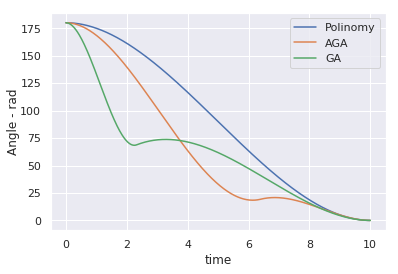

In [329]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta1']/np.pi, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_1.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

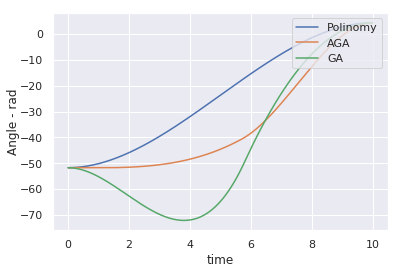

In [330]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta2']/np.pi, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_2.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

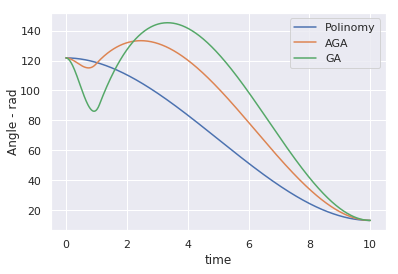

In [331]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta3']/np.pi, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_3.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

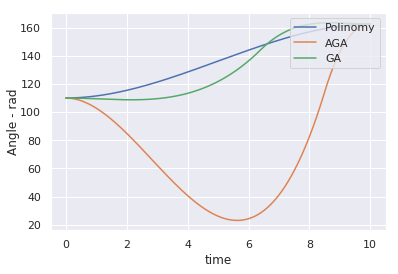

In [332]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta4']/np.pi, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_4.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

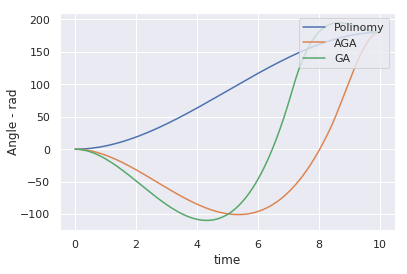

In [333]:
joints_polinomy.head()
t = np.linspace(0,10,500)
plt.plot(t, 180*joints_polinomy['theta5']/np.pi, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('Angle - rad', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('theta_5.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

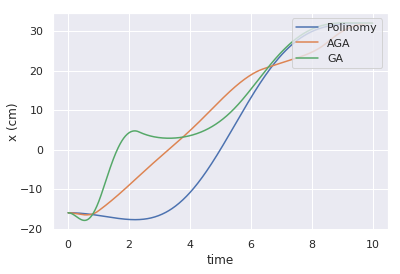

In [342]:
joints_polinomy.head()
t = np.linspace(0,10,500)

plt.plot(t, polinomy['x'].values, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('x (cm)', labelpad=0)
plt.legend(loc='upper right')

plt.savefig('x.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

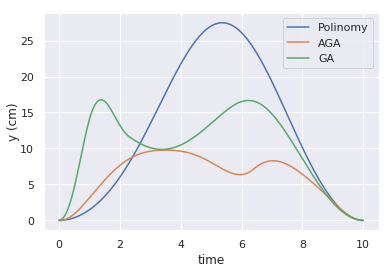

In [343]:
joints_polinomy.head()
t = np.linspace(0,10,500)

plt.plot(t, polinomy['y'].values, label = 'Polinomy')
plt.xlabel('time')
plt.ylabel('y (cm)', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('y.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

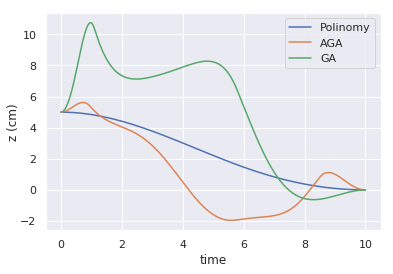

In [344]:
joints_polinomy.head()
t = np.linspace(0,10,500)

plt.plot(t, polinomy['z'].values, label = 'Polinomy')
plt.plot(t, adaptive_29['z'].values, label = 'AGA')
plt.plot(t, non_adaptive_29['z'].values, label = 'GA')
plt.xlabel('time')
plt.ylabel('z (cm)', labelpad=0)
plt.legend(loc='upper right')
plt.savefig('z.png', dpi=None, facecolor='w', edgecolor='w',
        transparent=False)
plt.show()

In [20]:
fit1_test1 = pd.DataFrame()
fit1_test2 = pd.DataFrame()
fit1_test3 = pd.DataFrame()
fit1_test4 = pd.DataFrame()
fit1_test5 = pd.DataFrame()
fit1_test6 = pd.DataFrame()
fit1_test7 = pd.DataFrame()
fit1_test8 = pd.DataFrame()
fit1_test9 = pd.DataFrame()
fit1_test10 = pd.DataFrame()
fit1_test11 = pd.DataFrame()
fit1_test12 = pd.DataFrame()
fit1_test13 = pd.DataFrame()
fit1_test14 = pd.DataFrame()
fit1_test15 = pd.DataFrame()
fit1_test16 = pd.DataFrame()
fit1_test17 = pd.DataFrame()
fit1_test18 = pd.DataFrame()
fit1_test19 = pd.DataFrame()
fit1_test20 = pd.DataFrame()
fit1_test21 = pd.DataFrame()


fit1_test1['distance'] = [47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334, 47.40385894268334]
fit1_test1['generation'] = np.linspace(1,30,30)
fit1_test1['Method'] = 'Polynomial'

fit1_test2['distance'] = [43.23785892295032, 43.23785892295032, 40.22152275763764, 35.26104198442589, 34.741527065322956, 34.741527065322956, 33.09137934791586, 32.11227519729716, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.759786473583507, 31.629877882463283, 31.629877882463283, 31.629877882463283, 31.629877882463283, 31.629877882463283, 31.629877882463283, 31.561984673052113, 31.561984673052113, 31.561984673052113, 31.561984673052113, 31.561984673052113]
fit1_test2['generation'] = np.linspace(1,30,30)
fit1_test2['Method'] = 'AGA'

fit1_test3['distance'] = [52.73824145514077, 44.35841234544781, 37.80730096589752, 36.250973600116325, 36.250973600116325, 36.250973600116325, 36.250973600116325, 36.250973600116325, 36.250973600116325, 34.41953195764583, 34.41953195764583, 34.41953195764583, 34.41953195764583, 34.41953195764583, 34.169312395055314, 34.169312395055314, 34.169312395055314, 34.169312395055314, 33.69550889051344, 33.69550889051344, 33.69550889051344, 33.69550889051344, 33.69550889051344, 33.69550889051344, 32.421639518368664, 32.421639518368664, 32.309391869851595, 32.309391869851595, 32.2146322234261, 32.2146322234261]
fit1_test3['generation'] = np.linspace(1,30,30)
fit1_test3['Method'] = 'AGA'

fit1_test4['distance'] = [41.208244338682164, 41.05110782642842, 35.72367429569841, 35.72367429569841, 35.31766848940147, 35.31766848940147, 33.808458186303525, 33.808458186303525, 33.72875519538413, 33.72875519538413, 33.72875519538413, 33.72875519538413, 33.72875519538413, 33.72875519538413, 33.72875519538413, 33.72875519538413, 33.1833596225271, 33.1833596225271, 33.1833596225271, 33.1833596225271, 33.1833596225271, 33.1833596225271, 32.78027729032239, 32.78027729032239, 32.78027729032239, 32.78027729032239, 32.78027729032239, 32.78027729032239, 32.78027729032239, 32.78027729032239]
fit1_test4['generation'] = np.linspace(1,30,30)
fit1_test4['Method'] = 'AGA'

fit1_test5['distance'] = [50.56591167680351, 40.647262143841786, 37.113425757394, 37.113425757394, 37.113425757394, 36.24312128007845, 36.24312128007845, 35.160256242226154, 35.160256242226154, 35.160256242226154, 35.160256242226154, 35.160256242226154, 35.160256242226154, 34.58997022934136, 34.58997022934136, 34.15774444874466, 34.15774444874466, 33.66666676848785, 33.371361797880034, 33.371361797880034, 33.371361797880034, 33.371361797880034, 33.371361797880034, 32.399728824768694, 32.399728824768694, 32.399728824768694, 32.399728824768694, 32.399728824768694, 32.399728824768694, 32.399728824768694]
fit1_test5['generation'] = np.linspace(1,30,30)
fit1_test5['Method'] = 'AGA'

fit1_test6['distance'] = [43.313247464836586, 37.00040958950243, 37.00040958950243, 37.00040958950243, 36.785092391016725, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 33.0053190148113, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.796658927996084, 32.666110607491675, 32.666110607491675, 32.666110607491675, 32.666110607491675, 32.666110607491675]
fit1_test6['generation'] = np.linspace(1,30,30)
fit1_test6['Method'] = 'AGA'

fit1_test7['distance'] = [44.20863658973445, 39.921651588466, 37.41607169610412, 34.990034093528145, 34.990034093528145, 34.990034093528145, 34.990034093528145, 34.990034093528145, 34.990034093528145, 34.990034093528145, 34.990034093528145, 34.94413193387518, 34.94413193387518, 34.94413193387518, 34.94413193387518, 34.94413193387518, 34.94413193387518, 34.685248077734755, 34.685248077734755, 34.48313160063053, 34.15300769415292, 34.15300769415292, 34.15300769415292, 33.24083682362728, 33.24083682362728, 33.14035319339276, 33.000719110397604, 33.000719110397604, 32.94282728312297, 32.94282728312297]
fit1_test7['generation'] = np.linspace(1,30,30)
fit1_test7['Method'] = 'AGA'

fit1_test8['distance'] = [44.90900505751389, 44.90900505751389, 43.280579422935745, 37.268073984834444, 37.268073984834444, 34.05218892957394, 34.05218892957394, 34.05218892957394, 34.05218892957394, 34.05218892957394, 34.05218892957394, 34.05218892957394, 34.05218892957394, 33.805649792642434, 33.805649792642434, 33.805649792642434, 32.99655694324621, 32.99655694324621, 32.99655694324621, 32.99655694324621, 32.99655694324621, 32.99655694324621, 32.99655694324621, 32.99655694324621, 32.757528964089516, 32.757528964089516, 32.757528964089516, 32.757528964089516, 32.757528964089516, 31.95125527357311]
fit1_test8['generation'] = np.linspace(1,30,30)
fit1_test8['Method'] = 'AGA'

fit1_test9['distance'] = [54.20222772159511, 48.62493948584792, 37.541426016163804, 37.541426016163804, 37.01992393830549, 37.01992393830549, 37.01992393830549, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 36.40384027170668, 35.61072820193535, 35.61072820193535, 35.61072820193535, 35.61072820193535, 35.61072820193535, 35.61072820193535, 33.56173432845582, 33.56173432845582, 33.56173432845582]
fit1_test9['generation'] = np.linspace(1,30,30)
fit1_test9['Method'] = 'AGA'

fit1_test10['distance'] = [51.43787751344037, 40.03763121829382, 40.03763121829382, 39.521698487249296, 39.521698487249296, 39.521698487249296, 39.32780089308562, 35.564062830204044, 35.564062830204044, 35.564062830204044, 35.564062830204044, 34.181763171503455, 34.181763171503455, 33.92933588099091, 33.92933588099091, 33.248850048628334, 33.248850048628334, 33.248850048628334, 33.248850048628334, 33.248850048628334, 33.248850048628334, 33.16423630174429, 33.16423630174429, 33.16423630174429, 33.16423630174429, 33.16423630174429, 32.73328126199802, 32.73328126199802, 32.73328126199802, 32.73328126199802]
fit1_test10['generation'] = np.linspace(1,30,30)
fit1_test10['Method'] = 'AGA'

fit1_test11['distance'] = [51.25627847306138, 44.95967405513528, 38.865340027584686, 38.865340027584686, 38.3834952863783, 38.05760380675943, 38.05760380675943, 38.05760380675943, 38.05760380675943, 38.05760380675943, 38.05760380675943, 36.68726092576676, 36.68726092576676, 36.68726092576676, 36.68726092576676, 36.68726092576676, 36.68726092576676, 36.68726092576676, 36.68726092576676, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652, 36.28620650877652]
fit1_test11['generation'] = np.linspace(1,30,30)
fit1_test11['Method'] = 'AGA'

fit1_test12['distance'] = [54.66465516512554, 43.80593330622392, 42.407418421639164, 37.378292839763404, 37.378292839763404, 36.36281198488459, 36.36281198488459, 36.36281198488459, 36.36281198488459, 36.36281198488459, 36.36281198488459, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 36.06663388627607, 34.802761251394514, 34.802761251394514, 34.802761251394514, 34.802761251394514, 34.802761251394514, 34.802761251394514, 34.802761251394514, 34.802761251394514, 34.802761251394514]
fit1_test12['generation'] = np.linspace(1,30,30)
fit1_test12['Method'] = 'GA'

fit1_test13['distance'] = [50.33303014312255, 44.99487601864761, 41.62107310626314, 41.62107310626314, 37.92632139528147, 36.8715579383671, 36.8715579383671, 36.8715579383671, 36.8715579383671, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.50772071391526, 36.08163156350139, 36.08163156350139, 34.42460920663124, 34.42460920663124, 34.42460920663124, 34.05989455371182, 34.05989455371182, 34.05989455371182, 34.05989455371182]
fit1_test13['generation'] = np.linspace(1,30,30)
fit1_test13['Method'] = 'GA'

fit1_test14['distance'] = [53.13424538616454, 44.658483935764075, 44.658483935764075, 37.68660089258389, 37.68660089258389, 37.68660089258389, 37.68660089258389, 37.68660089258389, 37.68660089258389, 36.79238378358658, 36.79238378358658, 36.79238378358658, 36.79238378358658, 35.47336135020836, 35.47336135020836, 34.551372403864576, 34.551372403864576, 34.551372403864576, 34.511666079377804, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973, 33.16902470668973]
fit1_test14['generation'] = np.linspace(1,30,30)
fit1_test14['Method'] = 'GA'

fit1_test15['distance'] = [39.23447245541089, 39.23447245541089, 39.23447245541089, 39.230012064050186, 39.230012064050186, 39.230012064050186, 39.230012064050186, 39.230012064050186, 37.85795112137958, 37.85795112137958, 37.85795112137958, 35.66357582190634, 35.66357582190634, 35.663317934404866, 35.663317934404866, 35.663317934404866, 35.663317934404866, 35.663317934404866, 35.663317934404866, 35.663317934404866, 35.663317934404866, 35.663317934404866, 34.74864558020509, 34.74864558020509, 34.74864558020509, 34.74864558020509, 33.81892479242267, 33.81892479242267, 33.81892479242267, 33.81892479242267]
fit1_test15['generation'] = np.linspace(1,30,30)
fit1_test15['Method'] = 'GA'

fit1_test16['distance'] = [45.278284388045165, 44.204879332026636, 38.01068906561864, 38.01068906561864, 36.761046276701585, 36.761046276701585, 36.761046276701585, 36.761046276701585, 36.02940486342833, 36.02940486342833, 36.02940486342833, 36.02940486342833, 36.02940486342833, 36.02940486342833, 34.496847426570035, 34.496847426570035, 34.496847426570035, 34.496847426570035, 34.496847426570035, 33.33145312219831, 33.33145312219831, 32.984959187387524, 32.984959187387524, 32.984959187387524, 32.984959187387524, 32.97358125020062, 32.651614344020956, 32.433824823576956, 32.433824823576956, 32.433824823576956]
fit1_test16['generation'] = np.linspace(1,30,30)
fit1_test16['Method'] = 'GA'

fit1_test17['distance'] = [45.57138269653565, 37.852545108684176, 37.852545108684176, 36.77380259331192, 36.77380259331192, 36.650367942526465, 36.650367942526465, 35.90915893710242, 35.90915893710242, 35.90915893710242, 35.90915893710242, 35.90915893710242, 35.90915893710242, 35.90915893710242, 35.90915893710242, 35.90915893710242, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 34.79225251489419, 33.74379723006115, 33.74379723006115, 33.74379723006115, 33.74379723006115]
fit1_test17['generation'] = np.linspace(1,30,30)
fit1_test17['Method'] = 'GA'

fit1_test18['distance'] = [44.26524091520957, 44.26524091520957, 38.90774234647977, 38.4922515014487, 38.260921200293346, 38.260921200293346, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.239216543678744, 34.00649002365168, 34.00649002365168, 34.00649002365168, 34.00649002365168, 34.00649002365168, 34.00649002365168, 33.38674437286569, 33.38674437286569, 33.38674437286569, 33.38674437286569, 33.106415504097306, 33.106415504097306, 33.106415504097306, 32.979159562004284, 32.979159562004284]
fit1_test18['generation'] = np.linspace(1,30,30)
fit1_test18['Method'] = 'GA'

fit1_test19['distance'] = [49.6059470294439, 49.6059470294439, 40.20466187290297, 40.20466187290297, 39.26966067057912, 39.26966067057912, 39.26966067057912, 39.26966067057912, 39.26966067057912, 38.74287648057766, 38.74287648057766, 38.74287648057766, 38.09340150508278, 38.09340150508278, 38.09340150508278, 38.09340150508278, 38.09340150508278, 38.09340150508278, 35.988705134774236, 35.988705134774236, 35.988705134774236, 35.705815705291066, 35.705815705291066, 35.705815705291066, 35.705815705291066, 35.705815705291066, 34.246404660790986, 34.246404660790986, 34.246404660790986, 34.246404660790986]
fit1_test19['generation'] = np.linspace(1,30,30)
fit1_test19['Method'] = 'GA'

fit1_test20['distance'] = [49.699792630773494, 46.58925317402028, 42.96182346016667, 42.96182346016667, 42.96182346016667, 42.42117350752884, 37.59903387239379, 37.25811926334319, 37.25811926334319, 36.5795298562498, 36.5795298562498, 36.5795298562498, 35.894890349857256, 35.894890349857256, 35.606321752838355, 35.606321752838355, 35.353660135740554, 35.23112925192302, 34.74203246326693, 34.74203246326693, 34.74203246326693, 34.74203246326693, 34.74203246326693, 33.62780353335314, 33.62780353335314, 33.62780353335314, 33.62780353335314, 33.62780353335314, 33.09519688732139, 33.09519688732139]
fit1_test20['generation'] = np.linspace(1,30,30)
fit1_test20['Method'] = 'GA'

fit1_test21['distance'] = [51.09408332461047, 44.26580091660322, 44.26580091660322, 44.26580091660322, 44.26580091660322, 41.67901971280913, 41.67901971280913, 40.213589459925075, 40.213589459925075, 40.213589459925075, 39.33603807463583, 39.33603807463583, 34.833607563679664, 34.833607563679664, 34.833607563679664, 32.98687300537599, 32.98687300537599, 32.98687300537599, 32.98687300537599, 32.98687300537599, 32.98687300537599, 32.98687300537599, 32.77299750502734, 32.77299750502734, 32.77299750502734, 32.77299750502734, 32.77299750502734, 32.77299750502734, 32.77299750502734, 32.77299750502734]
fit1_test21['generation'] = np.linspace(1,30,30)
fit1_test21['Method'] = 'GA'

fit1 = pd.concat([fit1_test1, fit1_test2, fit1_test3, fit1_test4, fit1_test5, fit1_test6, fit1_test7, fit1_test8, fit1_test9, fit1_test10, fit1_test11, fit1_test12, fit1_test13, fit1_test14, fit1_test15, fit1_test16, fit1_test17, fit1_test18, fit1_test19, fit1_test20, fit1_test21])





In [22]:
for i in range(1,31):
    fit2 = fit1.loc[fit1['Method'] == 'GA']
    fit3 = fit2.loc[fit2['generation']==i]
    values = np.array(fit3['distance'].values)
    print(stats.shapiro(values))

(0.9515755772590637, 0.6871640682220459)
(0.895180344581604, 0.19380320608615875)
(0.9254435300827026, 0.4045974016189575)
(0.9137892723083496, 0.3080463409423828)
(0.8110774159431458, 0.01976051740348339)
(0.8726027607917786, 0.1071859672665596)
(0.9462838768959045, 0.6247914433479309)
(0.9656387567520142, 0.8477301001548767)
(0.9775055646896362, 0.9504340291023254)
(0.9370077252388, 0.5202230215072632)
(0.9459001421928406, 0.6203180551528931)
(0.9022696614265442, 0.23199157416820526)
(0.950538158416748, 0.6748708486557007)
(0.9210714101791382, 0.36597755551338196)
(0.9308527708053589, 0.45633259415626526)
(0.974941611289978, 0.9325054883956909)
(0.9781953692436218, 0.9547827839851379)
(0.9765400886535645, 0.9440041184425354)
(0.9548286199569702, 0.7256828546524048)
(0.914621889591217, 0.3142707347869873)
(0.914621889591217, 0.3142707347869873)
(0.8733557462692261, 0.10936549305915833)
(0.9005199074745178, 0.22199299931526184)
(0.9247774481773376, 0.398527592420578)
(0.924777448177337

In [21]:
for i in range(1,31):
    fit2 = fit1.loc[fit1['Method'] == 'AGA']
    fit3 = fit2.loc[fit2['generation']==i]
    values = np.array(fit3['distance'].values)
    print(stats.shapiro(values))

(0.883007824420929, 0.141266867518425)
(0.9650456309318542, 0.8415004014968872)
(0.9018649458885193, 0.2296440154314041)
(0.9527559280395508, 0.7011566758155823)
(0.9523708820343018, 0.6965927481651306)
(0.9803861379623413, 0.9672010540962219)
(0.9406062364578247, 0.5597791075706482)
(0.9885197877883911, 0.9946688413619995)
(0.9914650321006775, 0.9982725381851196)
(0.9907612800598145, 0.9976477026939392)
(0.9907612800598145, 0.9976477026939392)
(0.9725040197372437, 0.9130409955978394)
(0.9725040197372437, 0.9130409955978394)
(0.9592664837837219, 0.7774767875671387)
(0.954317033290863, 0.7196390628814697)
(0.9501221776008606, 0.6699464321136475)
(0.9301064610481262, 0.44894057512283325)
(0.9135891795158386, 0.30656635761260986)
(0.8765373229980469, 0.1190449520945549)
(0.883573055267334, 0.14338143169879913)
(0.8691310882568359, 0.09765985608100891)
(0.9135587811470032, 0.3063412606716156)
(0.916114330291748, 0.3256828486919403)
(0.8633916974067688, 0.08365673571825027)
(0.8030705451965

/home/oscarkremer/.local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[Text(0, 0.5, 'Distance - cm'), Text(0.5, 0, 'Generation')]

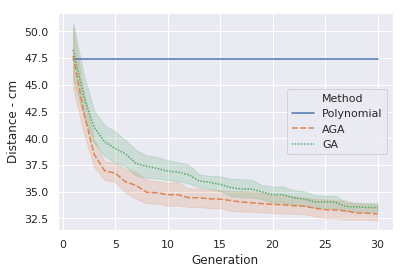

In [7]:
#test = sns.relplot(x="generation", y="distance", kind="line", data=plot_data)
sns.set(style="darkgrid")
ax = sns.lineplot(x="generation", y="distance", hue='Method', style="Method", data=fit1)
ax.set(xlabel='Generation', ylabel='Distance - cm')
#ax.set(ylim=(0,110))
#ax.set(xlim=(1,30))

In [8]:
aga =  [31.561984673052113, 32.2146322234261, 32.78027729032239, 32.399728824768694, 32.666110607491675]
ga =  [34.802761251394514,32.433824823576956, 33.81892479242267, 33.16902470668973,34.05989455371182]
ga = np.array(ga)
aga = np.array(aga)
interval_aga = sms.DescrStatsW(aga).tconfint_mean()
interval_ga = sms.DescrStatsW(ga).tconfint_mean()
print(np.mean(aga))
print(np.mean(ga))
print(interval_aga)
print(interval_ga)

32.32454672381219
33.65688602555913
(31.727904671058436, 32.92118877656595)
(32.54014923309553, 34.77362281802273)
